# Data Prep

### Data Fetch From Trino


In [1]:
"""
This script establishes a connection to a Presto database via the Trino Python client, 
executes a SQL query to fetch data, and then structures the fetched data into a pandas DataFrame.
The DataFrame is Clusters with appropriate column names, making the data ready for analysis.
"""

import trino
import pandas as pd
import datetime

# Connect to Trino
conn = trino.dbapi.connect(
    host="presto-gateway.corp.mongodb.com",
    port=443,
    user="jiawei.zhou@mongodb.com",
    catalog="awsdatacatalog",
    http_scheme="https",
    auth=trino.auth.BasicAuthentication(
        "jiawei.zhou@mongodb.com", "Youarethebest@1016"
    ),
)

# Execute query
cur = conn.cursor()

/Users/jiawei.zhou/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
cur.execute(
    f"""
select
	*
from
	awsdatacatalog.product_analytics.pnl_products_adoption_qualification_activation
"""
)

# Extract column names
columns = [desc[0] for desc in cur.description]

# Fetch rows
rows = cur.fetchall()

# Create DataFrame
df_raw = pd.DataFrame(rows, columns=columns)

# Convert 'ds' column to pandas datetime
df_raw["ds"] = pd.to_datetime(df_raw["ds"])

# Now perform the filtering with no type mismatch
df_raw = df_raw[
    (df_raw["ds"] >= pd.Timestamp("2023-02-01"))
    & (df_raw["ds"] <= pd.Timestamp("2024-02-01"))
]

In [3]:
# Set the maximum number of displayed rows
pd.set_option("display.max_rows", 100)

# Set the maximum number of displayed columns
pd.set_option("display.max_columns", 100)

# Data Profiling

In [4]:
# Parameters
product = "text_search"


In [5]:
# # # Base product name
# product = "text_search"

# Dynamically generate column names based on the product
product_ds = f"{product}_ds"
product_ind = f"{product}_ind"

# Print the results to verify
print(product_ds)
print(product_ind)

text_search_ds
text_search_ind


In [6]:
# Create a copy of the original DataFrame
data = df_raw.copy()

# Display rows
data.head()

,cluster_mrr_total,cluster_consumption_revenue,org_id,org_name,org_plan_type,group_id,group_name,group_type,is_internal_org,cluster_id,cluster_name,deployment_cluster_name,cluster_name_prefix,monitoring_cluster_id,created_at,cluster_age_month,deleted_at,cloudprovider,cloudprovider_count,region,region_count,is_cross_region,instance_size,instance_family,instance_class,tier,is_deleted,topology,replicaset_count,is_sharding,shard_count,is_global_cluster,cluster_mdb_major_version,db_version,disk_size_gb,is_multi_tenant_mongo,is_backup_enabled_cluster,is_backup_selected,backup_option,is_auto_expand_storage,is_auto_scaling_compute_enabled,is_auto_scaling_compute_scaledown_enabled,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,is_bi_connector,bi_node_type,cluster_state,disk_iops,...,org_created_date,org_registration_date,org_type,org_country,org_latest_mrr,email_segment_clean,marketing_channel_group,channel_group,channel_type,account_segment,atlas_org_region,pw_language,first_cluster_instance_size,first_cluster_instance_size_group,self_serve_or_sales_sold,atlas_org_registration_date,users,system_normalized_cpu_user_monthly_daily_avg,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,ds,text_search_ds,text_search_ind,vector_search_ds,vector_search_ind,timeseries_ds,timeseries_ind,sync_ds,sync_ind,triggers_functions_ds,triggers_functions_ind,charts_ds,charts_ind,onlinearchive_ds,onlinearchive_ind,adf_ds,adf_ind,sql_ds,sql_ind
0,1694.938333,3193.951062,5eb4439fe407c0551b7a9821,XP Investimentos,NDS_ENTERPRISE,623b6c8bcabd4a355151dcd3,CADASTRO PF BACKOFFICE - PRD,NDS,False,623b6ccd6ce12817ea3721da,AZ-PRD-PFBACKOFFICE,atlas-s1ps6p,az-prd-pfbackoffice,[623b6f847a28a8159d760cfb],2022-03-23 18:54:05.092,17.0,None,[AZURE],1,[BRAZIL_SOUTH],1,False,M20,STANDARD_B,General,PAID,False,REPLICASET,1,False,1,False,5.0,5.0.20,128.0,False,False,True,SNAPSHOTS,True,True,True,3.0,0.0,0.0,0.0,False,secondary,IDLE,NaN,...,2020-05-07 17:21:35.252,2020-05-07 17:21:35.295,NDS,BR,146889.177659,Business,Paid Search,Paid Search,Paid,Enterprise,AMER,None,M0,Free,Self Serve,2020-05-07,8.0,3.957506,103.034946,28.194591,11.258241,2.510797,10.788774,5.069178e+10,3.936791,103.225806,25.039024,7.223485,1.668295,7.288930,5.067746e+10,2023-08-01,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0
1,71.996250,47.337269,5eec4decf75b692cc662ef90,shibi's Org - 2020-06-19,NDS,5eec4ded9f7e9e320c65469e,jello,NDS,False,64d8647186ee8476213d9905,jupiter-uae,atlas-1jkj6n,jupiter-uae,[64d8668739344325ed07296b],2023-08-13 05:04:49.019,0.0,None,[AWS],1,[ME_CENTRAL_1],1,False,M10,None,General,PAID,False,REPLICASET,1,False,1,False,5.0,5.0.20,10.0,False,False,True,SNAPSHOTS,True,True,True,3.0,0.0,0.0,0.0,False,secondary,IDLE,3000.0,...,2020-06-19 05:32:28.092,2020-06-19 05:32:29.204,NDS,US,179.624901,Business,Organic Search,Organic Search,Non-Paid,High Tech,AMER,Java,M10,Dedicated,Self Serve,2020-06-19,5.0,2.046509,51.671698,14.918906,1.404673,0.186048,0.993669,2.334750e+07,2.053491,51.789474,14.941180,1.409869,0.186397,0.996452,2.339599e+07,2023-08-01,None,0,None,0,None,0,None,0,None,0,2022-12-01,1,None,0,None,0,None,0
2,9.125000,9.300000,5dd7b9a579358e94ad309e46,Honeyfield GmbH,NDS,5e090cfd5538553e68bdc468,src-production,NDS,False,610c0cbef66b971acf8efea9,rently-1,rently-1,rently-1,[610c0d4a9a2c587d3c12f1f6],2021-08-05 16:07:26.487,24.0,None,[AWS],1,[EU_CENTRAL_1],1,False,M2,None,General,PAID,False,REPLICASET,1,False,1,False,6.0,6.0.9,2.0,False,False,True,TENANT,False,False,False,3.0,0.0,0.0,

In [7]:
data["ds"].value_counts().sort_index()

ds
2023-02-01    138704
2023-03-01    143135
2023-04-01    144900
2023-05-01    148030
2023-06-01    150881
2023-07-01    153465
2023-08-01    156621
2023-09-01    158600
2023-10-01    161355
2023-11-01    164207
2023-12-01    165383
2024-01-01    169176
2024-02-01    171407
Name: count, dtype: int64

In [8]:
import pandas as pd

# Set pandas option to display float format without scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

# Use the describe function and print the result
data.describe()

,cluster_mrr_total,cluster_consumption_revenue,created_at,cluster_age_month,cloudprovider_count,region_count,replicaset_count,shard_count,disk_size_gb,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,disk_iops,connection_limit,database_limit,gb_per_week_in_limit,gb_per_week_out_limit,operations_per_second_limit,throttled_kb_per_second_limit,org_created_date,org_registration_date,org_latest_mrr,users,system_normalized_cpu_user_monthly_daily_avg,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,ds,text_search_ind,vector_search_ind,timeseries_ind,sync_ind,triggers_functions_ind,charts_ind,onlinearchive_ind,adf_ind,sql_ind
count,2025864.00,2025675.00,2025831,2025831.00,2025864.00,2025864.00,2025864.00,2025864.00,2025864.00,2025831.00,2025831.00,2025831.00,2025831.00,1129597.00,334253.00,334253.00,272594.00,272594.00,272594.00,272594.00,2025824,2025823,2021620.00,1984826.00,1689039.00,1961590.00,1961441.00,1961739.00,1961739.00,1688781.00,1961739.00,1689039.00,1961590.00,1961441.00,1961739.00,1961739.00,1688781.00,1961739.00,2025864,2025864.00,2025864.00,2025864.00,2025864.00,2025864.00,2025864.00,2025864.00,2025864.00,2025864.00
mean,453.77,557.56,2022-01-26 23:21:46.912471552,18.82,1.00,1.06,1.02,1.02,124.62,3.08,0.01,0.01,0.02,3118.36,499.85,90.78,24.62,28.75,269.23,100.00,2020-08-13 09:45:17.482785536,2020-07-10 11:30:09.628024576,40053.89,12.17,4.55,183.13,57.36,80.61,34.62,641.57,121370797147.19,4.40,183.41,56.38,78.78,29.83,573.92,121479499477.21,2023-08-08 12:06:26.651030272,0.03,0.00,0.01,0.01,0.04,0.05,0.01,0.01,0.00
min,0.01,-1.19,2016-05-23 00:26:36.730000,0.00,1.00,1.00,1.00,1.00,1.00,3.00,0.00,0.00,0.00,100.00,0.00,50.00,20.00,20.00,0.00,100.00,2017-08-24 13:36:38.707000,2016-01-13 00:05:48.253000,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,2023-02-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,58.52,50.07,2021-03-22 17:13:24.632999936,5.00,1.00,1.00,1.00,1.00,10.00,3.00,0.00,0.00,0.00,3000.00,500.00,100.00,20.00,20.00,200.00,100.00,2019-06-06 15:50:45.088000,2019-05-06 23:33:24.908000,151.73,1.00,2.14,53.07,15.07,0.95,0.18,1.01,733352361.21,2.11,53.03,15.08,0.90,0.19,0.93,733495789.83,2023-05-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,74.83,84.06,2022-05-27 09:11:27.408000,14.00,1.00,1.00,1.00,1.00,10.00,3.00,0.00,0.00,0.00,3000.00,500.00,100.00,20.00,20.00,200.00,100.00,2020-07-29 16:18:57.484999936,2020-07-06 23:15:03.915000064,1442.73,3.00,2.95,71.80,16.65,1.82,0.25,4.12,1624922244.51,2.81,71.74,16.49,1.75,0.22,2.23,1625031153.77,2023-08-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,205.40,230.24,2023-02-24 13:51:41.304000,29.00,1.00,1.00,1.00,1.00,40.00,3.00,0.00,0.00,0.00,3000.00,500.00,100.00,20.00,20.00,200.00,100.00,2021-12-14 12:37:48.992999936,2021-11-29 07:41:32.839000064,14688.66,6.00,4.62,132.21,27.70,12.56,1.94,59.96,11351208301.97,4.45,132.00,26.24,10.34,1.14,38.55,11352831280.60,2023-11-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,413801.50,696485.16,2024-02-29 00:33:09.244000,93.00,3.00,17.00,42.00,42.00,16384.00,210.00,30.00,3.00,14.00,64000.00,500.00,100.00,2000.00,100.00,2000.00,100.00,2024-02-28 23:42:06.881000,2024-02-28 23:42:07.055000,2340617.26,656.00,99.28,161251.72,118560.82,217043.03,526294.43,2458866.65,237755508943606.59,99.66,161319.71,117650.46,209043.79,579708.79,2520436.76,237763145256342.19,2024-02-01 00:00:00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
std,2623.85,3754.67,NaN,16.44,0.06,0.34,0.31,0.

### Null & 0 Values

In [9]:
import pandas as pd

# Calculate the total number of clusters (rows in your DataFrame)
total_clusters = data.shape[0]

# Calculate the null values count for each column
null_values = data.isnull().sum()

# Calculate the percentage of null values for each column
null_values_percentage = (null_values / total_clusters) * 100

# Calculate the 0 values count for each column
zero_values = (data == 0).sum()

# Calculate the percentage of 0 values for each column
zero_values_percentage = (zero_values / total_clusters) * 100

# Create a DataFrame to display the null values count and percentage
null_values_df = pd.DataFrame(
    {"Null Count": null_values, "Null Percentage": null_values_percentage}
)

# Create a DataFrame to display the 0 values count and percentage
zero_values_df = pd.DataFrame(
    {"Zero Count": zero_values, "Zero Percentage": zero_values_percentage}
)

# Merge the two DataFrames for a comprehensive view
values_df = pd.concat([null_values_df, zero_values_df], axis=1)

# Format the percentage values to string with a '%' sign for better readability
values_df = values_df.applymap(lambda x: f"{x:.2f}%" if isinstance(x, float) else x)

# Display rows where the Null Count or Zero Count is greater than 0
filtered_values_df = values_df[
    (values_df["Null Count"] > 0) | (values_df["Zero Count"] > 0)
]

# If you want to see the result
filtered_values_df

,Null Count,Null Percentage,Zero Count,Zero Percentage
cluster_consumption_revenue,189,0.01%,135856,6.71%
is_internal_org,0,0.00%,2025864,100.00%
deployment_cluster_name,33,0.00%,0,0.00%
cluster_name_prefix,33,0.00%,0,0.00%
monitoring_cluster_id,58076,2.87%,0,0.00%
created_at,33,0.00%,0,0.00%
cluster_age_month,33,0.00%,114018,5.63%
deleted_at,2025864,100.00%,0,0.00%
is_cross_region,0,0.00%,1938378,95.68%
instance_family,1225411,60.49%,0,0.00%


In [10]:
import pandas as pd

# Calculate the total number of clusters (rows in your DataFrame)
total_clusters = data.shape[0]

# Calculate the percentage of null values for each column
null_values_percentage = (data.isnull().sum() / total_clusters) * 100

# Identify columns to exclude from dropping (i.e., keep these columns regardless of their null percentage)
columns_to_keep = [product_ds, product_ind]

# Find columns with >= 40% null values, excluding the specified columns
columns_to_drop = [
    col
    for col in null_values_percentage.index
    if null_values_percentage[col] >= 40 and col not in columns_to_keep
]

# Drop these columns from the DataFrame
data = data.drop(columns=columns_to_drop)

### Variables Distribution

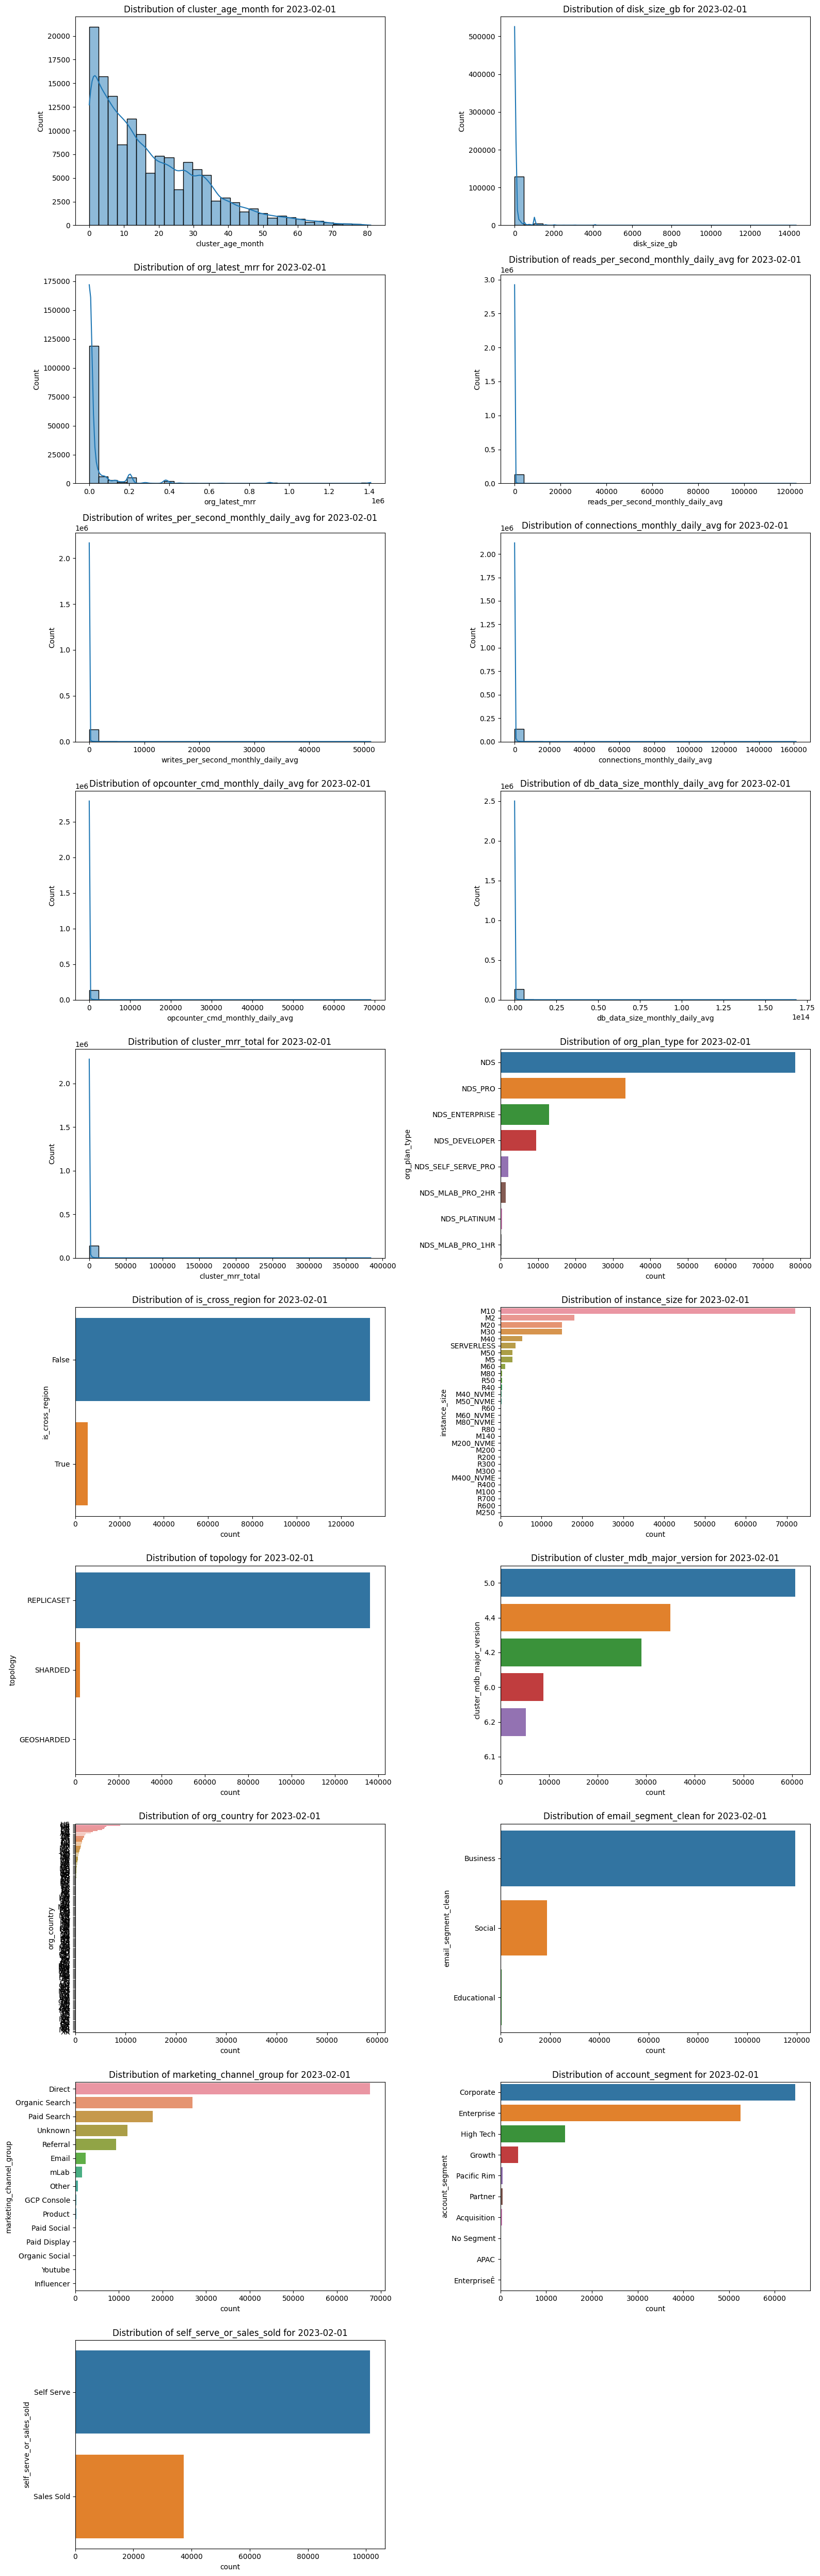

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Convert 'ds' to datetime format
data["ds"] = pd.to_datetime(data["ds"])

# Filtering the data for 'ds = 2023-02-01'
filtered_data = data[data["ds"] == "2023-02-01"]

# Update the lists of features as per your specification
categorical_features = [
    "org_plan_type",
    "is_cross_region",
    "instance_size",
    "topology",
    "cluster_mdb_major_version",
    "org_country",
    "email_segment_clean",
    "marketing_channel_group",
    "account_segment",
    "self_serve_or_sales_sold",
]

numerical_features = [
    "cluster_age_month",
    "disk_size_gb",
    "org_latest_mrr",
    "reads_per_second_monthly_daily_avg",
    "writes_per_second_monthly_daily_avg",
    "connections_monthly_daily_avg",
    "opcounter_cmd_monthly_daily_avg",
    "db_data_size_monthly_daily_avg",
    "cluster_mrr_total",
]

# Calculate the number of plots needed
num_plots = len(categorical_features) + len(numerical_features)
cols = 2
rows = num_plots // cols + (num_plots % cols > 0)

plt.figure(
    figsize=(16, max(5 * rows, 20))
)  # Adjusting the figure size based on the number of plots

# Plotting histograms for the new set of numerical variables
for i, var in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(filtered_data[var], kde=True, bins=30)
    plt.title(f"Distribution of {var} for 2023-02-01")

# Plotting bar plots for the new set of categorical variables
for j, var in enumerate(categorical_features, len(numerical_features) + 1):
    plt.subplot(rows, cols, j)
    order = filtered_data[var].value_counts().index
    sns.countplot(y=var, data=filtered_data, order=order)
    plt.title(f"Distribution of {var} for 2023-02-01")

plt.tight_layout()
plt.show()

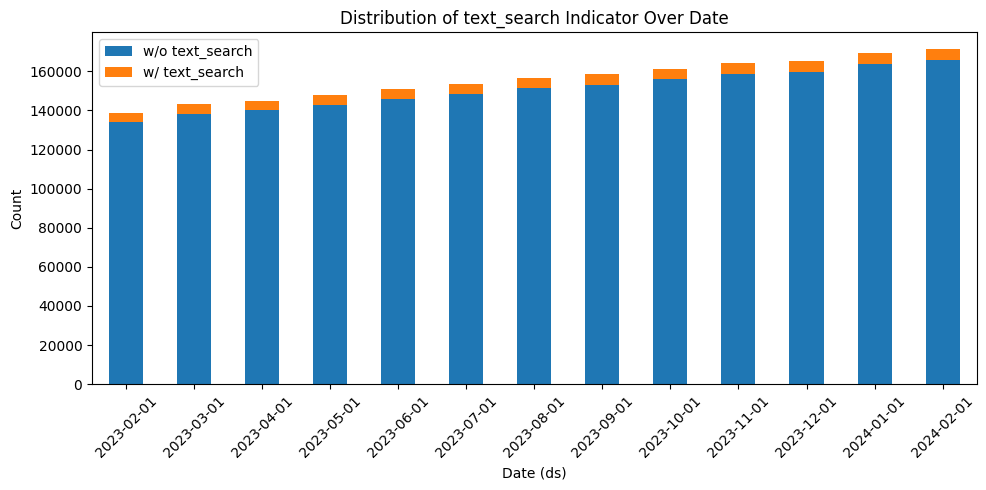

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the distribution of the product_ind target variable over the 'ds' date
target_distribution_over_ds = (
    data.groupby("ds")[product_ind].value_counts().unstack(fill_value=0)
)

# Convert the index (which is 'ds') to datetime objects first
target_distribution_over_ds.index = pd.to_datetime(target_distribution_over_ds.index)

# Now, you can safely extract the date part only to ignore the time part
target_distribution_over_ds.index = target_distribution_over_ds.index.date

# Use the parameter in the plot
target_distribution_over_ds.plot(kind="bar", stacked=True, figsize=(10, 5))

# Integrate the product_title into the title and legend labels
plt.title(f"Distribution of {product} Indicator Over Date")
plt.xlabel("Date (ds)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(
    labels=[f"w/o {product}", f"w/ {product}"],
    loc="upper left",
)
plt.tight_layout()
plt.grid(False)
plt.show()

# Matching Process

### Assigning Treatment & Control

In [114]:
import pandas as pd

# Create a copy of the original DataFrame
data = df_raw.copy()

data["ds"] = pd.to_datetime(data["ds"])
data[product_ds] = pd.to_datetime(data[product_ds])

# Determine the earliest product_ds date for each cluster
earliest_product = data.groupby("cluster_id")[product_ds].min().reset_index()


def assign_group(row):
    # Convert string dates to datetime objects for comparison
    start_date = pd.to_datetime("2023-02-01")
    end_date = pd.to_datetime("2023-12-31")

    if pd.isnull(row[product_ds]):
        return "control group"
    elif row[product_ds] < start_date or row[product_ds] > end_date:
        return "not eligible"
    elif start_date <= row[product_ds] <= end_date:
        return "treatment group"
    else:
        return "control group"


earliest_product["group_assignment"] = earliest_product.apply(assign_group, axis=1)


# Merge the group assignment back to the original dataset
data = pd.merge(
    data,
    earliest_product[["cluster_id", "group_assignment"]],
    on="cluster_id",
    how="left",
)

In [115]:
# Ensure product_ds is in datetime format
data[product_ds] = pd.to_datetime(data[product_ds], errors="coerce")

# 1. Count of all unique clusters
total_unique_clusters = data["cluster_id"].nunique()

# 2. Count of unique clusters with product_ind equal to 1
unique_clusters_product_ind_1 = data[data[product_ind] == 1]["cluster_id"].nunique()

# 3. Count of unique clusters with product_ds >= '2023-02-01' and <= '2023-12-31'
unique_clusters_product_ds = data[
    (data[product_ds] >= "2023-02-01") & (data[product_ds] <= "2023-12-31")
]["cluster_id"].nunique()

# 4. Count of unique clusters in each 'group_assignment'
unique_clusters_per_group_assignment = data.groupby("group_assignment")[
    "cluster_id"
].nunique()

# Display the results with dynamic column names
print(f"Total number of unique clusters: {total_unique_clusters}")
print(f"Unique clusters with '{product_ind}' = 1: {unique_clusters_product_ind_1}")
print(
    f"Unique clusters with '{product_ds}' >= '2023-02-01' and < '2023-12-31': {unique_clusters_product_ds}"
)
print("Unique clusters in each 'group_assignment':")
for group_assignment, count in unique_clusters_per_group_assignment.items():
    print(f"  - {group_assignment}: {count}")

Total number of unique clusters: 247167
Unique clusters with 'text_search_ind' = 1: 6133
Unique clusters with 'text_search_ds' >= '2023-02-01' and < '2023-12-31': 2739
Unique clusters in each 'group_assignment':
  - control group: 241034
  - not eligible: 3394
  - treatment group: 2739


In [116]:
import pandas as pd
import numpy as np

# Convert 'ds' and product_ds to datetime format in one step
data[["ds", product_ds]] = data[["ds", product_ds]].apply(pd.to_datetime)

# Define the filtering conditions in advance to improve readability
eligible = data["group_assignment"] != "not eligible"
date_range = (data["ds"] >= "2023-02-01") & (data["ds"] <= "2023-12-31")
not_deleted = data["is_deleted"] != True  # Add not deleted filter
mrr_greater_than_zero = data["cluster_mrr_total"] > 0  # Add MRR > 0 filter

# Apply all filtering conditions
data = data[eligible & date_range & not_deleted & mrr_greater_than_zero]

# Use a single line to create 'same_month_indicator' by comparing years and months directly
data["same_month_indicator"] = (
    (data["ds"].dt.to_period("M") == data[product_ds].dt.to_period("M"))
).astype(int)

# Convert 'ds' to a 'month_year' period format for monthly analysis directly
data["month_year"] = data["ds"].dt.to_period("M")

# Set 'product_month_indicator' using period comparison for simplicity
data["product_month_indicator"] = (
    data[product_ds].notnull()
    & (data[product_ds].dt.to_period("M") <= data["month_year"])
).astype(int)

In [117]:
# Group by 'product_ind' and count unique 'cluster_id's
unique_clusters_product_ind = data.groupby(product_ind)["cluster_id"].nunique()

# Use the dynamically generated 'product_ind' in the print statement
print(f"Unique clusters by {product_ind}:\n", unique_clusters_product_ind)

# Group by 'same_month_indicator' and count unique 'cluster_id's
unique_clusters_same_month_indicator = data.groupby("same_month_indicator")[
    "cluster_id"
].nunique()
print(
    "\nUnique clusters by same_month_indicator:\n", unique_clusters_same_month_indicator
)

# Group by 'group_assignment' and count unique 'cluster_id's
unique_clusters_group_assignment = data.groupby("group_assignment")[
    "cluster_id"
].nunique()
print("\nUnique clusters by group_assignment:\n", unique_clusters_group_assignment)

Unique clusters by text_search_ind:
 text_search_ind
0    221966
1      2739
Name: cluster_id, dtype: int64

Unique clusters by same_month_indicator:
 same_month_indicator
0    224694
1      2726
Name: cluster_id, dtype: int64

Unique clusters by group_assignment:
 group_assignment
control group      221966
treatment group      2739
Name: cluster_id, dtype: int64


### Check Missing Values

In [118]:
import pandas as pd

# Convert 'ds' column to datetime format
data["ds"] = pd.to_datetime(data["ds"])

# Filter data for a specific date
filtered_data = data[data["ds"] == "2023-02-01"]

# Count missing values by 'group_assignment'
missing_values = filtered_data.isnull().groupby(filtered_data["group_assignment"]).sum()

# Add a row to show total missing values for each column
missing_values.loc["Total Missing"] = missing_values.sum()

# Calculate and print the total number of unique clusters per 'group_assignment'
total_clusters = filtered_data.groupby("group_assignment")["cluster_id"].nunique()

# Print the missing values table
missing_values

,cluster_mrr_total,cluster_consumption_revenue,org_id,org_name,org_plan_type,group_id,group_name,group_type,is_internal_org,cluster_id,cluster_name,deployment_cluster_name,cluster_name_prefix,monitoring_cluster_id,created_at,cluster_age_month,deleted_at,cloudprovider,cloudprovider_count,region,region_count,is_cross_region,instance_size,instance_family,instance_class,tier,is_deleted,topology,replicaset_count,is_sharding,shard_count,is_global_cluster,cluster_mdb_major_version,db_version,disk_size_gb,is_multi_tenant_mongo,is_backup_enabled_cluster,is_backup_selected,backup_option,is_auto_expand_storage,is_auto_scaling_compute_enabled,is_auto_scaling_compute_scaledown_enabled,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,is_bi_connector,bi_node_type,cluster_state,disk_iops,...,org_latest_mrr,email_segment_clean,marketing_channel_group,channel_group,channel_type,account_segment,atlas_org_region,pw_language,first_cluster_instance_size,first_cluster_instance_size_group,self_serve_or_sales_sold,atlas_org_registration_date,users,system_normalized_cpu_user_monthly_daily_avg,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,ds,text_search_ds,text_search_ind,vector_search_ds,vector_search_ind,timeseries_ds,timeseries_ind,sync_ds,sync_ind,triggers_functions_ds,triggers_functions_ind,charts_ds,charts_ind,onlinearchive_ds,onlinearchive_ind,adf_ds,adf_ind,sql_ds,sql_ind,group_assignment,same_month_indicator,month_year,product_month_indicator
group_assignment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
control group,0,109,0,0,0,0,0,0,0,0,0,0,0,3584,0,0,134071,0,0,0,0,0,0,68713,3612,0,0,0,0,0,0,0,0,0,0,0,0,0,15523,0,0,0,0,0,0,0,0,0,0,60911,...,132,0,0,0,0,2018,95,119127,1,1,0,0,2606,24924,3964,3969,3959,3959,24933,3959,24924,3964,3969,3959,3959,24933,3959,0,134071,0,134009,0,133179,0,133367,0,130019,0,127547,0,132147,0,132445,0,133940,0,0,0,0,0
treatment group,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1795,0,0,0,0,0,0,910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,0,0,0,0,0,0,0,0,0,0,562,...,1,0,0,0,0,21,0,1489,0,0,0,0,35,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1726,0,1732,0,1779,0,1504,0,1516,0,1696,0,1733,0,1788,0,0,0,0,0
Total Missing,0,109,0,0,0,0,0,0,0,0,0,0,0,3584,0,0,135866,0,0,0,0,0,0,69623,3612,0,0,0,0,0,0,0,0,0,0,0,0,0,15672,0,0,0,0,0,0,0,0,0,0,61473,...,133,0,0,0,0,2039,95,120616,1,1,0,0,2641,24925,3965,3970,3960,3960,24934,3960,24925,3965,3970,3960,3960,24934,3960,0,134071,0,135735,0,134911,0,135146,0,131523,0,129063,0,133843,0,134178,0,135728,0,0,0,0,0


In [119]:
# Define features and target
features = [
    "cluster_age_month",
    "org_plan_type",
    "is_cross_region",
    "instance_size",
    "topology",
    "cluster_mdb_major_version",
    "disk_size_gb",
    "org_country",
    "org_latest_mrr",
    "email_segment_clean",
    "marketing_channel_group",
    "self_serve_or_sales_sold",
    "reads_per_second_monthly_daily_avg",
]

# Ensure 'ds' column is in datetime format (if not already done)
data["ds"] = pd.to_datetime(data["ds"])

# Filter the DataFrame for rows where 'ds' equals '2023-02-01'
filtered_data = data[data["ds"] == "2023-02-01"]

# Calculate the percentage of rows with any missing value, grouped by 'group_assignment'
# Only considering the filtered data for '2023-02-01'
percentage_missing = (
    filtered_data[features]
    .isnull()
    .any(axis=1)
    .groupby(filtered_data["group_assignment"])
    .mean()
    * 100
)

# Format the output with a '%' sign
formatted_percentage_missing = percentage_missing.apply(lambda x: f"{x:.2f}%")

# Display the formatted percentages
formatted_percentage_missing

group_assignment
control group      3.06%
treatment group    0.11%
dtype: object

### Logit Regression & Feature Importance

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (
    roc_auc_score,
    precision_recall_curve,
    auc,
    cohen_kappa_score,
    matthews_corrcoef,
    log_loss,
)
from sklearn.pipeline import make_pipeline

# Filter dataset for ds='2023-12-01'
data_filtered = data[data["ds"] == "2023-12-01"]

X = data_filtered[features]
y = data_filtered["product_month_indicator"]

# Drop rows with any null values in the features
X = X.dropna()
y = y[X.index]

# Apply Label Encoding to categorical features
le = LabelEncoder()
for column in X.select_dtypes(include=["object"]).columns:
    X[column] = le.fit_transform(X[column])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Address imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Logistic Regression classifier within a pipeline that includes scaling
model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
model.fit(X_train_smote, y_train_smote)

# Predict and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[
    :, 1
]  # Probability estimates for the positive class

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print additional evaluation metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")
print(f"Cohen’s Kappa: {cohen_kappa:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Log Loss: {logloss:.4f}")

# Extract the logistic regression model from the pipeline
logistic_regression_model = model.named_steps["logisticregression"]

# Get the coefficients from the logistic regression model
coefficients = logistic_regression_model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients})

# Calculate the absolute values of coefficients to determine their impact regardless of direction (positive/negative)
feature_importance["Absolute_Coefficient"] = feature_importance["Coefficient"].abs()

# Sort the features by their absolute coefficient values in descending order
feature_importance = feature_importance.sort_values(
    by="Absolute_Coefficient", ascending=False
)

# Display the sorted feature importance
feature_importance

              precision    recall  f1-score   support

           0       0.99      0.64      0.78     30985
           1       0.03      0.59      0.05       525

    accuracy                           0.64     31510
   macro avg       0.51      0.61      0.42     31510
weighted avg       0.97      0.64      0.77     31510

[[19910 11075]
 [  217   308]]
ROC-AUC Score: 0.6565
Precision-Recall AUC: 0.0331
Cohen’s Kappa: 0.0205
Matthews Correlation Coefficient: 0.0611
Log Loss: 0.6222


,Feature,Coefficient,Absolute_Coefficient
8,org_latest_mrr,-0.71,0.71
3,instance_size,0.42,0.42
1,org_plan_type,-0.38,0.38
4,topology,-0.31,0.31
9,email_segment_clean,-0.27,0.27
11,self_serve_or_sales_sold,-0.25,0.25
0,cluster_age_month,-0.25,0.25
2,is_cross_region,0.23,0.23
12,reads_per_second_monthly_daily_avg,0.13,0.13
6,disk_size_gb,0.09,0.09


### Exact + Fuzzy Match

In [121]:
# Non Outliers Match


import pandas as pd
import numpy as np

base_match_variable = "month_year"
final_refine_variable = "cluster_mrr_total"
# match_order = feature_importance['Feature'].head(6).tolist()
# Directly specifying the match_order list with predefined order
match_order = [
    "org_latest_mrr",
    "instance_size",
    "org_plan_type",
    "self_serve_or_sales_sold",
    "topology",
    "cluster_age_month",
]

data.loc[:, "pair_index"] = pd.NA
global_pair_index = 0

unique_months = data[base_match_variable].drop_duplicates()

for month in unique_months:
    month_data = data[data[base_match_variable] == month].copy()

    # Remove outliers for 'cluster_mrr_total'
    Q1 = month_data[final_refine_variable].quantile(0.25)
    Q3 = month_data[final_refine_variable].quantile(0.75)
    IQR = Q3 - Q1
    # Keep rows that are not considered outliers
    month_data = month_data[
        (month_data[final_refine_variable] >= (Q1 - 1.5 * IQR))
        & (month_data[final_refine_variable] <= (Q3 + 1.5 * IQR))
    ]

    treatment_data = month_data[
        (month_data["group_assignment"] == "treatment group")
        & (month_data["same_month_indicator"] == 1)
    ]
    control_data = month_data[month_data["group_assignment"] == "control group"].copy()

    for t_index, t_row in treatment_data.iterrows():
        potential_matches = control_data.copy()
        match_found = False  # Flag to indicate if a match has been found

        for feature in match_order:
            initial_potential_matches = (
                potential_matches.copy()
            )  # Keep a copy before filtering

            if feature in ["org_latest_mrr", "cluster_age_month"]:  # Numerical features
                match_value = t_row[feature]
                potential_matches = potential_matches[
                    (potential_matches[feature] >= match_value * 0.9)
                    & (potential_matches[feature] <= match_value * 1.1)
                ]
            else:  # Categorical features
                potential_matches = potential_matches[
                    potential_matches[feature] == t_row[feature]
                ]

            if potential_matches.empty:
                potential_matches = initial_potential_matches  # Restore before filtering if no match found
            else:
                match_found = True  # Update flag when matches are found

            if len(potential_matches) < 3:
                break

        # If matches are found for any feature
        if match_found and not potential_matches.empty:
            potential_matches["difference"] = abs(
                potential_matches[final_refine_variable] - t_row[final_refine_variable]
            )
            closest_match_index = potential_matches["difference"].idxmin()

            # Update 'pair_index' for both treatment and matched control
            data.loc[t_index, "pair_index"] = global_pair_index
            data.loc[closest_match_index, "pair_index"] = global_pair_index
            global_pair_index += 1  # Increment for the next pair

            # Remove the matched control to avoid reusing
            control_data = control_data.drop(closest_match_index)

# Convert 'pair_index' to Int64 and filter unmatched entries
data["pair_index"] = data["pair_index"].astype("Int64")
final_matched_dataset = data.dropna(subset=["pair_index"])

In [122]:
# # Outliers Match


# import pandas as pd
# import numpy as np

# base_match_variable = "month_year"
# final_refine_variable = "cluster_mrr_total"
# match_order = [
#     # "org_latest_mrr",
#     "instance_size",
#     # "org_plan_type",
#     # "self_serve_or_sales_sold",
#     # "topology",
#     "cluster_age_month",
# ]

# data.loc[:, "pair_index"] = pd.NA
# global_pair_index = 0

# unique_months = data[base_match_variable].drop_duplicates()

# for month in unique_months:
#     month_data = data[data[base_match_variable] == month].copy()

#     # Calculate IQR and detect outliers
#     Q1 = month_data[final_refine_variable].quantile(0.25)
#     Q3 = month_data[final_refine_variable].quantile(0.75)
#     IQR = Q3 - Q1
#     outlier_condition = (
#         (month_data[final_refine_variable] < (Q1 - 1.5 * IQR)) |
#         (month_data[final_refine_variable] > (Q3 + 1.5 * IQR))
#     )
#     outliers = month_data[outlier_condition]
    
#     # Separate treatment and control data, focusing on outliers
#     treatment_data = outliers[
#         (outliers["group_assignment"] == "treatment group") &
#         (outliers["same_month_indicator"] == 1)
#     ]
#     control_data = month_data[outlier_condition & (month_data["group_assignment"] == "control group")].copy()

#     for t_index, t_row in treatment_data.iterrows():
#         potential_matches = control_data.copy()
#         match_found = False  # Flag to indicate if a match has been found

#         for feature in match_order:
#             initial_potential_matches = potential_matches.copy()  # Keep a copy before filtering

#             if feature in ["org_latest_mrr", "cluster_age_month"]:  # Numerical features
#                 match_value = t_row[feature]
#                 potential_matches = potential_matches[
#                     (potential_matches[feature] >= match_value * 0.9) &
#                     (potential_matches[feature] <= match_value * 1.1)
#                 ]
#             else:  # Categorical features
#                 potential_matches = potential_matches[
#                     potential_matches[feature] == t_row[feature]
#                 ]

#             if potential_matches.empty:
#                 potential_matches = initial_potential_matches  # Restore if no match found
#             else:
#                 match_found = True  # Update flag when matches are found

#             if len(potential_matches) < 3:
#                 break

#         # If matches are found
#         if match_found and not potential_matches.empty:
#             potential_matches["difference"] = abs(
#                 potential_matches[final_refine_variable] - t_row[final_refine_variable]
#             )
#             closest_match_index = potential_matches["difference"].idxmin()

#             # Update 'pair_index' for both treatment and matched control
#             data.loc[t_index, "pair_index"] = global_pair_index
#             data.loc[closest_match_index, "pair_index"] = global_pair_index
#             global_pair_index += 1  # Increment for the next pair

#             # Remove the matched control to avoid reusing
#             control_data = control_data.drop(closest_match_index)

# # Convert 'pair_index' to Int64 and filter unmatched entries
# data["pair_index"] = data["pair_index"].astype("Int64")
# final_matched_dataset = data.dropna(subset=["pair_index"])


### Balance Check

In [123]:
# Calculate unique clusters in the treatment group from original data
unique_clusters_treatment_original = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "treatment group"
]["cluster_id"].nunique()
print(f"Unique clusters in treatment: {unique_clusters_treatment_original}")

# Calculate unique clusters in both groups from final_matched_dataset
unique_clusters_treatment_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "treatment group"
]["cluster_id"].nunique()
unique_clusters_control_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "control group"
]["cluster_id"].nunique()
print(
    f"Unique clusters in treatment: {unique_clusters_treatment_final}, control: {unique_clusters_control_final}"
)

# Calculate total cluster counts in both groups
total_clusters_treatment_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "treatment group"
]["cluster_id"].count()
total_clusters_control_final = final_matched_dataset[
    final_matched_dataset["group_assignment"] == "control group"
]["cluster_id"].count()
print(
    f"Total clusters in treatment: {total_clusters_treatment_final}, control: {total_clusters_control_final}"
)

Unique clusters in treatment: 1610
Unique clusters in treatment: 1610, control: 1588
Total clusters in treatment: 1610, control: 1610


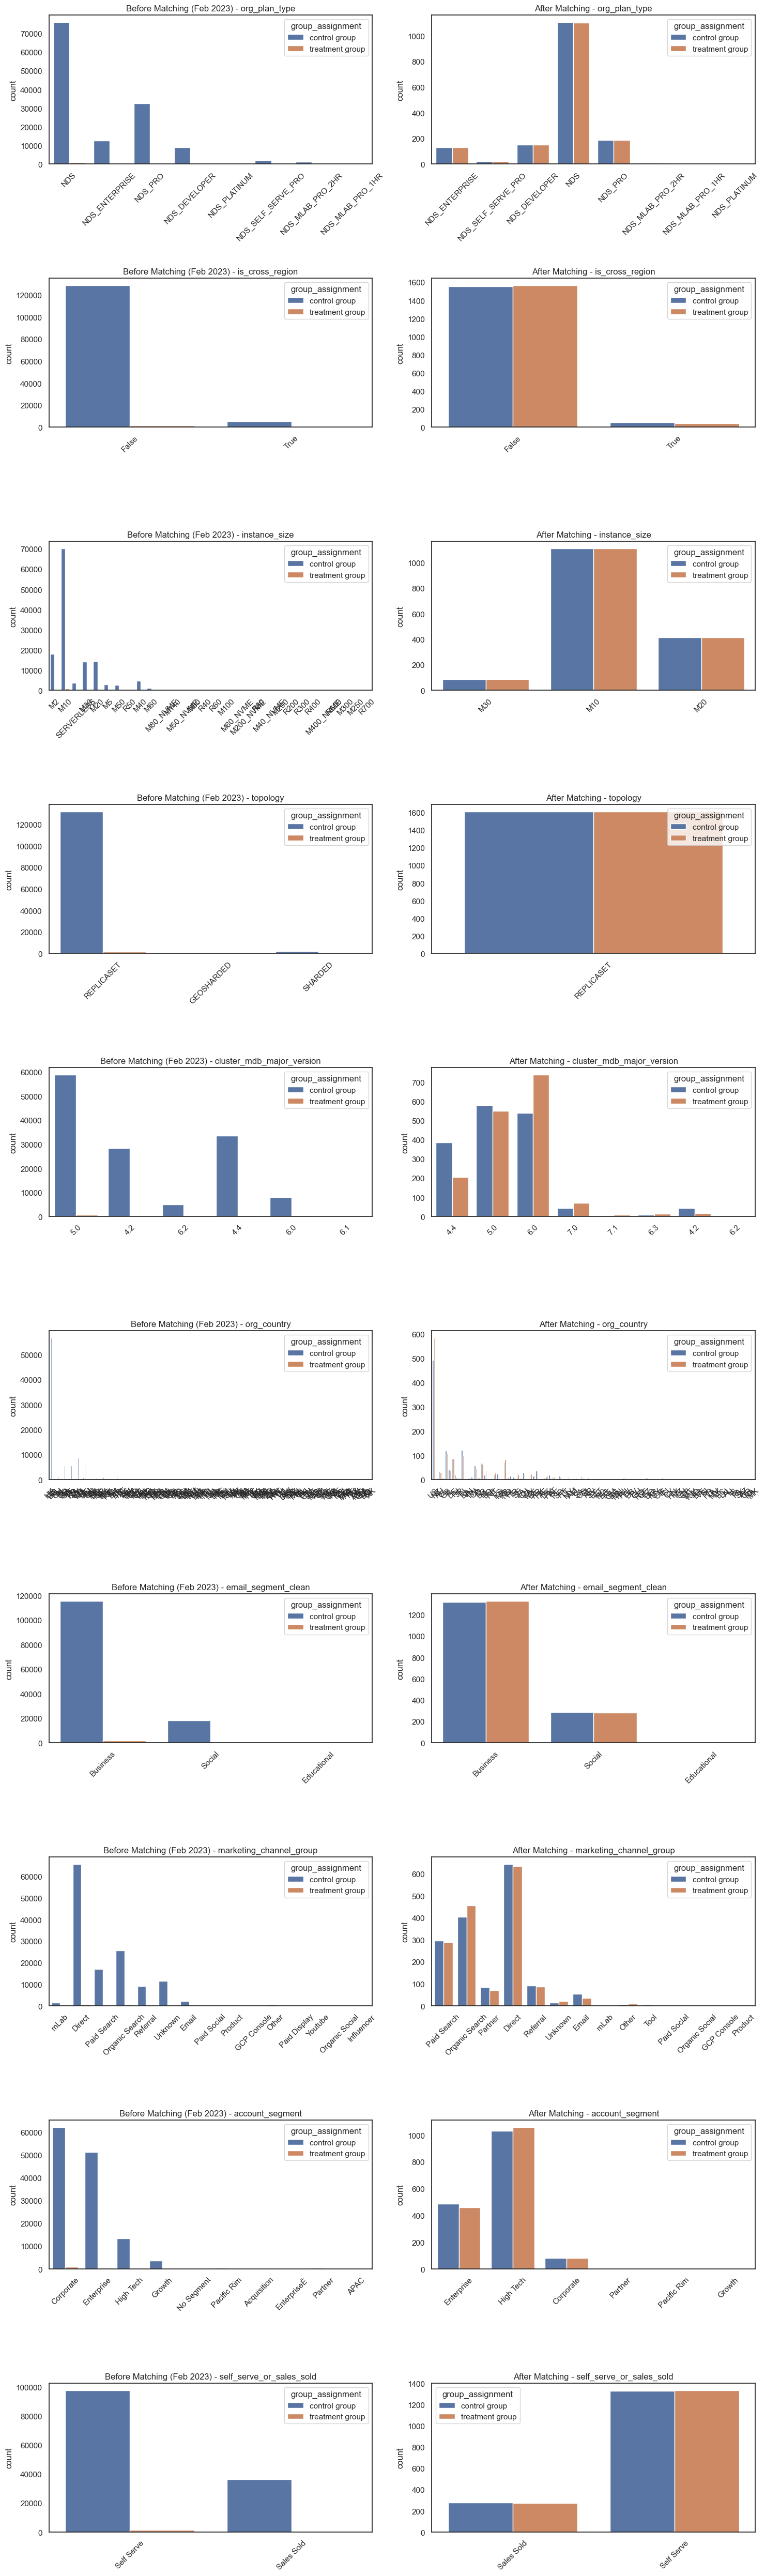

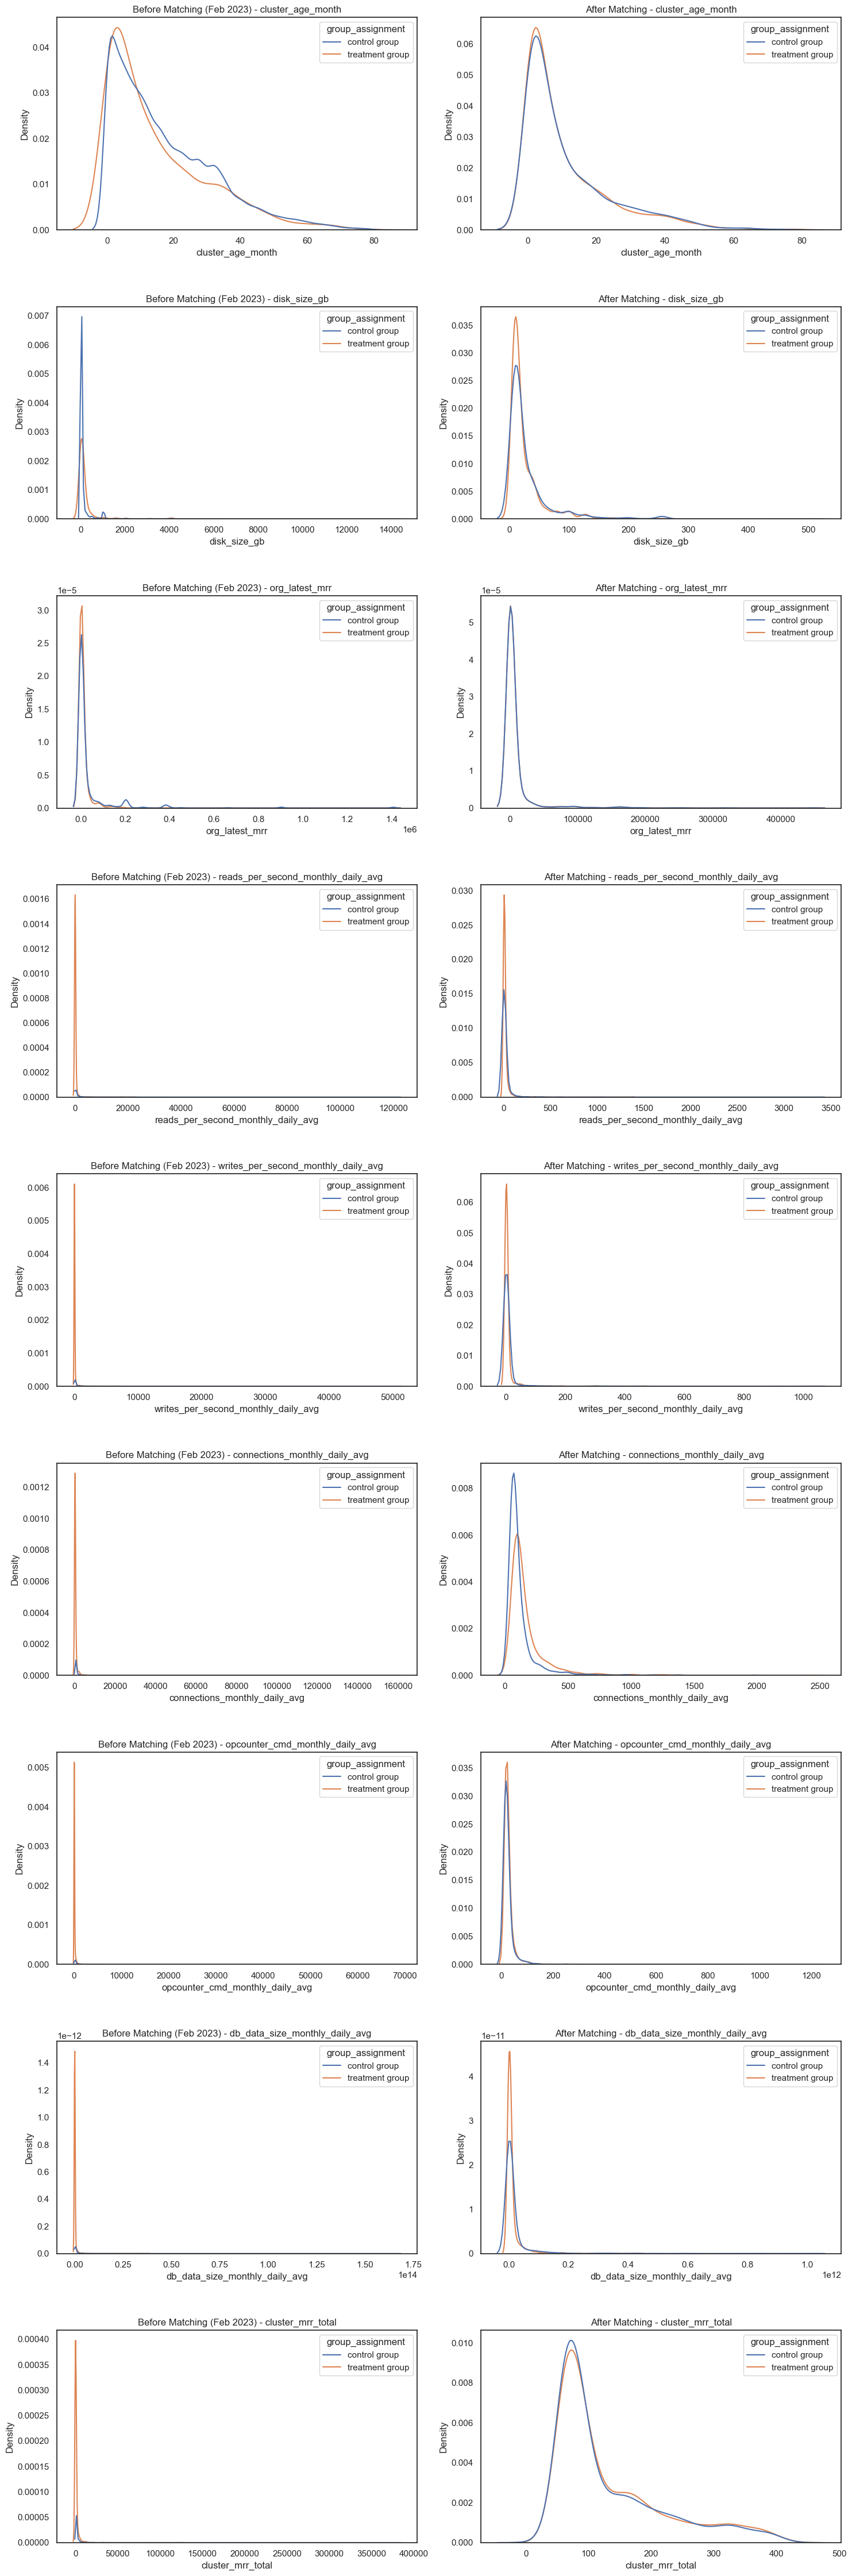

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical and numerical features
categorical_features = [
    "org_plan_type",
    "is_cross_region",
    "instance_size",
    "topology",
    "cluster_mdb_major_version",
    "org_country",
    "email_segment_clean",
    "marketing_channel_group",
    "account_segment",
    "self_serve_or_sales_sold",
]

numerical_features = [
    "cluster_age_month",
    "disk_size_gb",
    "org_latest_mrr",
    "reads_per_second_monthly_daily_avg",
    "writes_per_second_monthly_daily_avg",
    "connections_monthly_daily_avg",
    "opcounter_cmd_monthly_daily_avg",
    "db_data_size_monthly_daily_avg",
    "cluster_mrr_total",
]

# Filter data for Feb 2023
feb_2023_data = data[
    (data["ds"].dt.year == 2023)
    & (data["ds"].dt.month == 2)
    & (
        (data["group_assignment"] == "treatment group")
        | (data["group_assignment"] == "control group")
    )
]

# Plotting categorical features with count plots
fig, axes = plt.subplots(
    len(categorical_features),
    2,
    figsize=(15, 5 * len(categorical_features)),
    squeeze=False,
)
for i, feature in enumerate(categorical_features):
    # Before Matching - Feb 2023 Data
    sns.countplot(x=feature, hue="group_assignment", data=feb_2023_data, ax=axes[i, 0])
    axes[i, 0].set_title(f"Before Matching (Feb 2023) - {feature}")
    axes[i, 0].tick_params(axis="x", rotation=45)
    axes[i, 0].set_xlabel("")  # Remove x-label to save space

    # After Matching
    sns.countplot(
        x=feature, hue="group_assignment", data=final_matched_dataset, ax=axes[i, 1]
    )
    axes[i, 1].set_title(f"After Matching - {feature}")
    axes[i, 1].tick_params(axis="x", rotation=45)
    axes[i, 1].set_xlabel("")  # Remove x-label to save space

plt.tight_layout(h_pad=3)  # Adjust vertical spacing to prevent overlap
plt.show()

# Now, plotting numerical features with KDE plots
fig, axes = plt.subplots(
    len(numerical_features), 2, figsize=(15, 5 * len(numerical_features)), squeeze=False
)
for i, feature in enumerate(numerical_features):
    # Before Matching - Feb 2023 Data
    sns.kdeplot(
        data=feb_2023_data,
        x=feature,
        hue="group_assignment",
        ax=axes[i, 0],
        common_norm=False,
    )
    axes[i, 0].set_title(f"Before Matching (Feb 2023) - {feature}")

    # After Matching
    sns.kdeplot(
        data=final_matched_dataset,
        x=feature,
        hue="group_assignment",
        ax=axes[i, 1],
        common_norm=False,
    )
    axes[i, 1].set_title(f"After Matching - {feature}")

plt.tight_layout(h_pad=3)
plt.show()

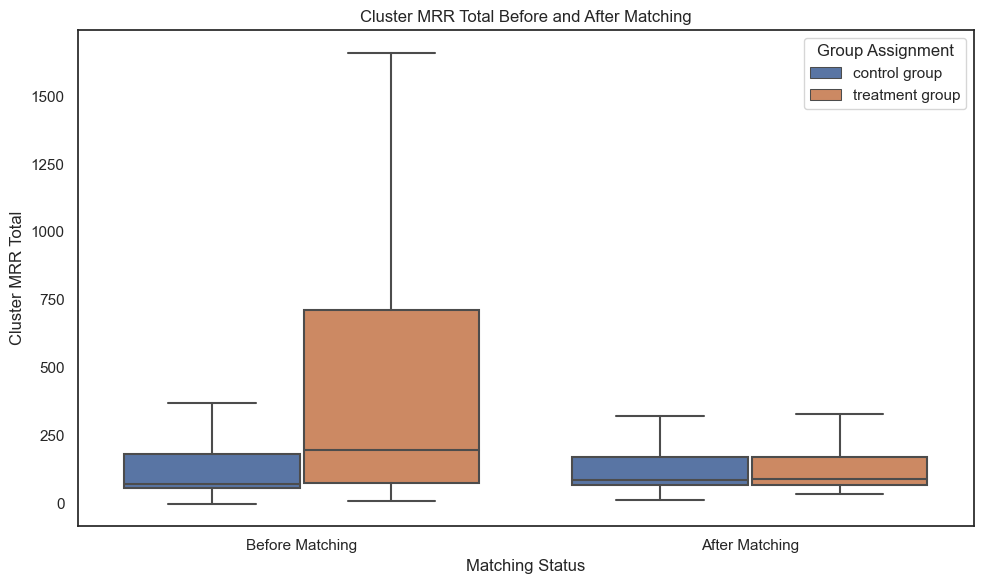

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for '2023-02-01' in 'data' for before matching, and use 'final_matched_dataset' for after matching
before_matching_data = data[data["ds"] == "2023-02-01"][
    ["group_assignment", "cluster_mrr_total"]
].copy()
before_matching_data["Match_Status"] = "Before Matching"

after_matching_data = final_matched_dataset[
    ["group_assignment", "cluster_mrr_total"]
].copy()
after_matching_data["Match_Status"] = "After Matching"

# Combine and plot without outliers
combined_data = pd.concat([before_matching_data, after_matching_data])
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Match_Status",
    y="cluster_mrr_total",
    hue="group_assignment",
    data=combined_data,
    showfliers=False,
)
plt.title("Cluster MRR Total Before and After Matching")
plt.xlabel("Matching Status")
plt.ylabel("Cluster MRR Total")
plt.legend(title="Group Assignment")
plt.tight_layout()
plt.show()

# Analysis

### Data Manipulation

In [126]:
import pandas as pd
from datetime import datetime

# Copy df_raw to avoid altering the original DataFrame
data = df_raw.copy()

# Ensure 'ds' columns in the copied data and final_matched_dataset are datetime objects
data["ds"] = pd.to_datetime(data["ds"])
final_matched_dataset["ds"] = pd.to_datetime(final_matched_dataset["ds"])

# Merge final_matched_dataset with the filtered copied data on 'cluster_id'
merged_data = pd.merge(
    final_matched_dataset[["cluster_id", "ds"]],
    data[["cluster_id", "ds", "cluster_consumption_revenue"]],
    on="cluster_id",
    how="left",
    suffixes=("_final", "_raw"),
)

# Filter to include records where 'ds_raw' is equal to or after 'ds_final'
filtered_data = merged_data[merged_data["ds_raw"] >= merged_data["ds_final"]].copy()

# Calculate the month difference
filtered_data["month_diff"] = (
    (filtered_data["ds_raw"].dt.year - filtered_data["ds_final"].dt.year) * 12
    + filtered_data["ds_raw"].dt.month
    - filtered_data["ds_final"].dt.month
)

# Pivot the table based on 'month_diff' for MRR totals
pivot_mrr_totals = filtered_data.pivot_table(
    index="cluster_id",
    columns="month_diff",
    values="cluster_consumption_revenue",
    aggfunc="first",
).reset_index()

# Flatten the columns and rename them to "Month X"
pivot_mrr_totals.columns = ["cluster_id"] + [
    f"Month {col}" if isinstance(col, int) else col
    for col in pivot_mrr_totals.columns[1:]
]

# Merge the pivot table back into final_matched_dataset
final_dataset_with_monthly_mrr = pd.merge(
    final_matched_dataset, pivot_mrr_totals, on="cluster_id", how="left"
)

# Fixed date for imputation
fixed_date = datetime(2024, 2, 1)
mrr_columns = [col for col in final_dataset_with_monthly_mrr.columns if "Month" in col]


# Function to impute MRR values
def impute_mrr(row):
    for col in mrr_columns:
        month_num = int(col.split(" ")[1]) if "Month" in col else 0
        month_diff = (
            (fixed_date.year - row["ds"].year) * 12 + fixed_date.month - row["ds"].month
        )
        if pd.isnull(row[col]) and month_num <= month_diff:
            row[col] = 0
    return row


# Apply the imputation row-wise
final_dataset_with_monthly_mrr = final_dataset_with_monthly_mrr.apply(
    impute_mrr, axis=1
)

# Display the result
final_dataset_with_monthly_mrr.head()

,cluster_mrr_total,cluster_consumption_revenue,org_id,org_name,org_plan_type,group_id,group_name,group_type,is_internal_org,cluster_id,cluster_name,deployment_cluster_name,cluster_name_prefix,monitoring_cluster_id,created_at,cluster_age_month,deleted_at,cloudprovider,cloudprovider_count,region,region_count,is_cross_region,instance_size,instance_family,instance_class,tier,is_deleted,topology,replicaset_count,is_sharding,shard_count,is_global_cluster,cluster_mdb_major_version,db_version,disk_size_gb,is_multi_tenant_mongo,is_backup_enabled_cluster,is_backup_selected,backup_option,is_auto_expand_storage,is_auto_scaling_compute_enabled,is_auto_scaling_compute_scaledown_enabled,cluster_electable_node_count,cluster_readonly_node_count,cluster_secondary_node_count,cluster_analytics_node_count,is_bi_connector,bi_node_type,cluster_state,disk_iops,...,connections_monthly_daily_avg,opcounter_cmd_monthly_daily_avg,reads_per_second_monthly_daily_avg,writes_per_second_monthly_daily_avg,document_crud_monthly_daily_avg,db_data_size_monthly_daily_avg,system_normalized_cpu_user_monthly_avg_daily_median,connections_monthly_avg_daily_median,opcounter_cmd_monthly_avg_daily_median,reads_per_second_monthly_avg_daily_median,writes_per_second_monthly_avg_daily_median,document_crud_monthly_avg_daily_median,db_data_size_avg_daily_median,ds,text_search_ds,text_search_ind,vector_search_ds,vector_search_ind,timeseries_ds,timeseries_ind,sync_ds,sync_ind,triggers_functions_ds,triggers_functions_ind,charts_ds,charts_ind,onlinearchive_ds,onlinearchive_ind,adf_ds,adf_ind,sql_ds,sql_ind,group_assignment,same_month_indicator,month_year,product_month_indicator,pair_index,Month 0,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12
0,332.43,620.64,60ad544479373676a3aca75a,Digital Store,NDS_ENTERPRISE,60dcc7da9a6ee34e504e5dee,DSOTF_STRESS,NDS,False,62ffb07e9d7bf23dc3cb8663,dsotf-stress-staging-4,atlas-51pgih,dsotf-stress-staging-4,[62ffb1edb83bd82bd85def74],2022-08-19 15:47:10.158,16.00,None,[GCP],1,[CENTRAL_US],1,False,M30,None,General,PAID,False,REPLICASET,1,False,1,False,4.4,4.4.26,40.00,False,False,False,None,True,False,False,3.00,0.00,0.00,0.00,False,secondary,IDLE,NaN,...,56.96,16.21,4.62,0.20,1.89,5109591174.44,1.87,56.87,16.20,4.63,0.20,1.56,5109610218.06,2023-12-01,NaT,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,control group,0,2023-12,0,297,620.64,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90.29,147.54,62f2d8991af2652bbceea7de,BidOne,NDS_SELF_SERVE_PRO,63f294ef1c74421789ef9a67,uat-mongo,NDS,False,63f528f589dc38674589130f,saf-uat-mongo,atlas-ddql4j,saf-uat-mongo,[63f52b1f59dc6046535cb37a],2023-02-21 20:26:29.076,10.00,None,[AZURE],1,[SOUTH_AFRICA_NORTH],1,False,M10,None,General,PAID,False,REPLICASET,1,False,1,False,5.0,5.0.23,8.00,False,False,True,SNAPSHOTS,True,False,False,3.00,0.00,0.00,0.00,False,secondary,IDLE,NaN,...,72.46,16.79,3.33,0.28,1.34,1097520087.88,5.73,72.48,16.78,3.32,0.27,1.27,1097657178.48,2023-12-01,2023-12-01,1,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,treatment group,1,2023-12,1,155,147.54,139.69,130.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123.10,0.00,62b54119a58d5469872f65a1,Terry's Org - 2022-06-24,NDS_DEVELOPER,62b54119a58d5469872f65a7,mj-middleware,NDS,False,63b863054dc3293ec54004b7,Cluster0,atlas-z2nila,ac-imv0bbl,[63b86610cab7554898cd9253],2023-01-06 18:05:57.553,9.00,None,[GCP],1,[AUSTRALIA_SOUTHEAST_2],1,False,M10,None,General,PAID,False,REPLICASET,1,False,1,False,5.0,5.0.22,10.00,False,False,True,SNAPSHOTS,True,False,False,3.00,0.00,0.00,0.00,False,secondary,IDLE,NaN,...,612.62,17.68,3.71,41.39,71.94,5074950725.20,4.42,633.65,17.51,4.06,41.87,75.25,5075825427.10,2023-10-01,NaT,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,None,0,control group,0,2023-10,0,557,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65.16,159.46,636a4353950566755721d0f7,JPMC GOLD:DEV ENGINEERING,NDS_ENTERPRISE,63ce7c314971c00cc7105456,110318-111372-15694

### Average MRR

In [127]:
#  To check the revenue impact of the winsorization

import pandas as pd
import numpy as np
from scipy.stats import mstats

# Dynamically generate MRR columns
mrr_columns = [col for col in final_dataset_with_monthly_mrr.columns if "Month" in col]
mrr_columns = sorted(mrr_columns, key=lambda x: int(x.split(" ")[-1]))[:12]

def winsorize_by_month(data, mrr_columns, limits=[0.05, 0.05]):
    cutoffs = {}
    for month in mrr_columns:
        # Create a new column name for the winsorized data
        winsorized_column_name = f"{month} Winsorized"

        # Select non-zero and non-null values for winsorization
        valid_values = data[(data[month] != 0) & (data[month].notna())][month]
        winsorized_values = mstats.winsorize(valid_values, limits=limits)

        # Store winsorized values in a new column, aligning with original indices
        data[winsorized_column_name] = data[month]  # Copy original data
        data.loc[(data[month] != 0) & (data[month].notna()), winsorized_column_name] = winsorized_values

        # Calculate and store cutoff values
        lower_cutoff = np.percentile(valid_values, limits[0]*100)
        upper_cutoff = np.percentile(valid_values, 100 - limits[1]*100)
        cutoffs[month] = (lower_cutoff, upper_cutoff)

    return data, cutoffs

def calculate_sum_of_differences(data):
    sum_of_differences = {}
    for month in mrr_columns:
        original_column = month
        winsorized_column = f"{month} Winsorized"

        # Calculate differences between original and winsorized values where both are not NaN
        data['Difference'] = data.apply(
            lambda row: row[original_column] - row[winsorized_column] 
            if pd.notna(row[original_column]) and pd.notna(row[winsorized_column]) 
            else 0, axis=1)
        
        # Sum the differences for the month
        total_difference = data['Difference'].sum()
        sum_of_differences[month] = total_difference

    # Remove the temporary 'Difference' column to clean up the DataFrame
    data.drop(columns=['Difference'], inplace=True)

    return sum_of_differences

# Apply winsorization to the dataset and store in a new dataframe
final_dataset_with_monthly_mrr, month_cutoffs = winsorize_by_month(final_dataset_with_monthly_mrr, mrr_columns)

# Print the cutoffs for each month
for month, cutoff in month_cutoffs.items():
    print(f"{month}: Lower Cutoff = {cutoff[0]}, Upper Cutoff = {cutoff[1]}")

# Calculate the sum of differences for each month
sum_of_differences = calculate_sum_of_differences(final_dataset_with_monthly_mrr)

# Print the results
for month, total in sum_of_differences.items():
    print(f"{month}: Sum of Differences = {total}")

# Calculate the total sum of all differences across all months
total_sum_of_all_differences = sum(sum_of_differences.values())

# Print the total sum of all differences
print(f"Total Sum of All Differences: {total_sum_of_all_differences}")


/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_90167/4084974355.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[winsorized_column_name] = data[month]  # Copy original data
/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_90167/4084974355.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[winsorized_column_name] = data[month]  # Copy original data
/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_90167/4084974355.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is us

Month 0: Lower Cutoff = 59.061000000000014, Upper Cutoff = 410.8269356994754
Month 1: Lower Cutoff = 60.45000000000001, Upper Cutoff = 440.22658326898056
Month 2: Lower Cutoff = 60.466000000000015, Upper Cutoff = 493.09694738589945
Month 3: Lower Cutoff = 60.57726389652605, Upper Cutoff = 524.2016080818609
Month 4: Lower Cutoff = 60.73600000000001, Upper Cutoff = 554.644
Month 5: Lower Cutoff = 60.802500000000016, Upper Cutoff = 585.9149353217078
Month 6: Lower Cutoff = 61.0655, Upper Cutoff = 626.0244948251035
Month 7: Lower Cutoff = 60.249999999999986, Upper Cutoff = 623.2869990611873
Month 8: Lower Cutoff = 61.34742606882774, Upper Cutoff = 738.1361772138282
Month 9: Lower Cutoff = 62.06249999999999, Upper Cutoff = 742.6396806132645
Month 10: Lower Cutoff = 62.497, Upper Cutoff = 758.9228942855979
Month 11: Lower Cutoff = 62.22, Upper Cutoff = 813.1163779673082
Month 0: Sum of Differences = 22331.146584373917
Month 1: Sum of Differences = 40480.56972047636
Month 2: Sum of Difference

In [91]:
import pandas as pd
import numpy as np
from scipy.stats import mstats

# Assuming 'final_dataset_with_monthly_mrr' is defined in your session.
# Dynamically generate MRR columns
mrr_columns = [col for col in final_dataset_with_monthly_mrr.columns if "Month" in col]
mrr_columns = sorted(mrr_columns, key=lambda x: int(x.split(" ")[-1]))[:12]

def winsorize_by_month(data, mrr_columns, limits=[0.05, 0.05]):
    cutoffs = {}
    for month in mrr_columns:
        # Create a new column name for the winsorized data
        winsorized_column_name = f"{month} Winsorized"

        # Select non-zero and non-null values for winsorization
        valid_values = data[(data[month] != 0) & (data[month].notna())][month]
        winsorized_values = mstats.winsorize(valid_values, limits=limits)

        # Store winsorized values in a new column, aligning with original indices
        data[winsorized_column_name] = data[month]  # Copy original data
        data.loc[(data[month] != 0) & (data[month].notna()), winsorized_column_name] = winsorized_values

        # Calculate and store cutoff values
        lower_cutoff = np.percentile(valid_values, limits[0]*100)
        upper_cutoff = np.percentile(valid_values, 100 - limits[1]*100)
        cutoffs[month] = (lower_cutoff, upper_cutoff)

    return data, cutoffs

# Apply winsorization to the dataset and store in a new dataframe
final_dataset_with_monthly_mrr, month_cutoffs = winsorize_by_month(final_dataset_with_monthly_mrr, mrr_columns)

# Print the cutoffs for each month
for month, cutoff in month_cutoffs.items():
    print(f"{month}: Lower Cutoff = {cutoff[0]}, Upper Cutoff = {cutoff[1]}")


Month 0: Lower Cutoff = 59.061000000000014, Upper Cutoff = 410.8269356994754
Month 1: Lower Cutoff = 60.45000000000001, Upper Cutoff = 440.22658326898056
Month 2: Lower Cutoff = 60.466000000000015, Upper Cutoff = 493.09694738589945
Month 3: Lower Cutoff = 60.57726389652605, Upper Cutoff = 524.2016080818609
Month 4: Lower Cutoff = 60.73600000000001, Upper Cutoff = 554.644
Month 5: Lower Cutoff = 60.802500000000016, Upper Cutoff = 585.9149353217078
Month 6: Lower Cutoff = 61.0655, Upper Cutoff = 626.0244948251035
Month 7: Lower Cutoff = 60.249999999999986, Upper Cutoff = 623.2869990611873
Month 8: Lower Cutoff = 61.34742606882774, Upper Cutoff = 738.1361772138282
Month 9: Lower Cutoff = 62.06249999999999, Upper Cutoff = 742.6396806132645
Month 10: Lower Cutoff = 62.497, Upper Cutoff = 758.9228942855979
Month 11: Lower Cutoff = 62.22, Upper Cutoff = 813.1163779673082


/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_90167/2766960747.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[winsorized_column_name] = data[month]  # Copy original data
/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_90167/2766960747.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[winsorized_column_name] = data[month]  # Copy original data
/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_90167/2766960747.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is us

In [93]:
import pandas as pd
import numpy as np
from scipy.stats import mstats

# Assuming 'final_dataset_with_monthly_mrr' and 'mrr_columns' are already defined.

def calculate_sum_of_differences(data):
    sum_of_differences = {}
    for month in mrr_columns:
        original_column = month
        winsorized_column = f"{month} Winsorized"

        # Calculate differences between original and winsorized values where both are not NaN
        data['Difference'] = data.apply(
            lambda row: row[original_column] - row[winsorized_column] 
            if pd.notna(row[original_column]) and pd.notna(row[winsorized_column]) 
            else 0, axis=1)
        
        # Sum the differences for the month
        total_difference = data['Difference'].sum()
        sum_of_differences[month] = total_difference

    # Remove the temporary 'Difference' column to clean up the DataFrame
    data.drop(columns=['Difference'], inplace=True)

    return sum_of_differences

# Calculate the sum of differences for each month
sum_of_differences = calculate_sum_of_differences(final_dataset_with_monthly_mrr)

# Print the results
for month, total in sum_of_differences.items():
    print(f"{month}: Sum of Differences = {total}")


/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_90167/1281554547.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Difference'] = data.apply(


Month 0: Sum of Differences = 22331.146584373917
Month 1: Sum of Differences = 40480.56972047636
Month 2: Sum of Differences = 48469.50152059822
Month 3: Sum of Differences = 64595.53529474915
Month 4: Sum of Differences = 49533.76490645415
Month 5: Sum of Differences = 53314.41574745228
Month 6: Sum of Differences = 53804.376938578724
Month 7: Sum of Differences = 47532.142123629244
Month 8: Sum of Differences = 45314.57311218392
Month 9: Sum of Differences = 46786.7867548465
Month 10: Sum of Differences = 41225.86208131456
Month 11: Sum of Differences = 48018.06996991586


In [94]:
# Assuming 'sum_of_differences' has been calculated from the previous step

# Calculate the total sum of all differences across all months
total_sum_of_all_differences = sum(sum_of_differences.values())

# Print the total sum of all differences
print(f"Total Sum of All Differences: {total_sum_of_all_differences}")


Total Sum of All Differences: 561406.7447545729


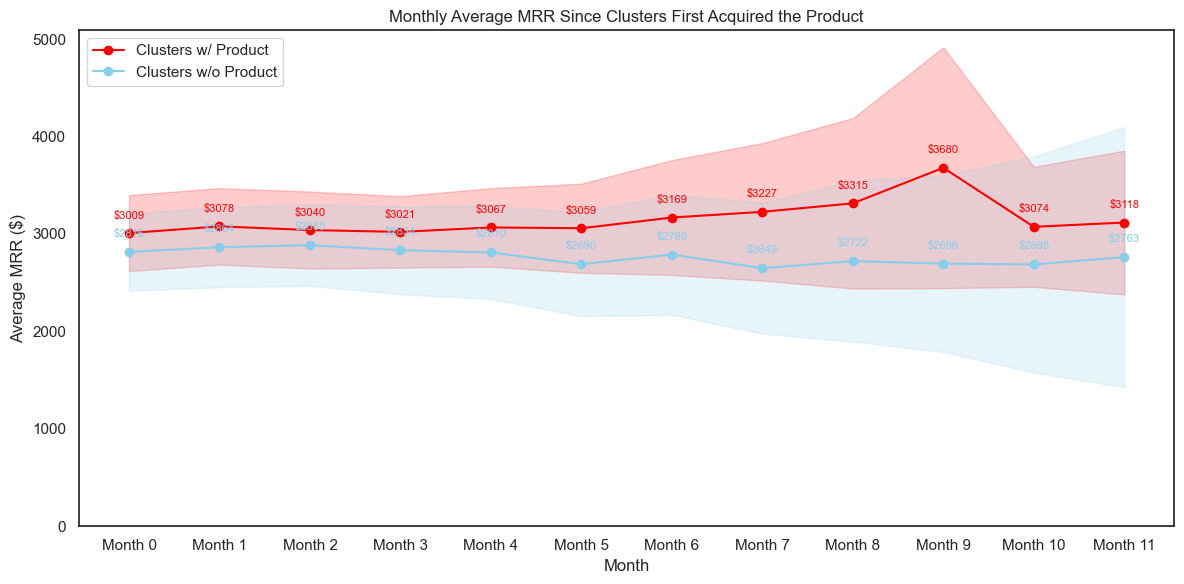

In [110]:
## Average MRR without Winsorization

# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import sem, t

# # Dynamically generate MRR columns
# mrr_columns = [col for col in final_dataset_with_monthly_mrr.columns if "Month" in col]
# mrr_columns = sorted(mrr_columns, key=lambda x: int(x.split(" ")[-1]))[:12]

# def calculate_means_and_ci(data, confidence=0.95):
#     n = len(data)
#     mean = np.mean(data)
#     std_err = sem(data) if n > 1 else 0
#     margin = std_err * t.ppf((1 + confidence) / 2, n - 1)
#     return mean, mean - margin, mean + margin

# original_group_colors = {"treatment group": "red", "control group": "skyblue"}
# group_rename = {
#     "treatment group": "Clusters w/ Product",
#     "control group": "Clusters w/o Product",
# }

# plt.figure(figsize=(12, 6))

# for original_group, color in original_group_colors.items():
#     new_group_name = group_rename[original_group]
#     means = []
#     lower_cis = []
#     upper_cis = []
#     for month in mrr_columns:
#         month_data = final_dataset_with_monthly_mrr[
#             (final_dataset_with_monthly_mrr["group_assignment"] == original_group)
#             & final_dataset_with_monthly_mrr[month].notna()
#         ][month]
#         mean, lower_ci, upper_ci = calculate_means_and_ci(month_data)
#         means.append(mean)
#         lower_cis.append(lower_ci)
#         upper_cis.append(upper_ci)

#     plt.plot(mrr_columns, means, marker="o", label=new_group_name, color=color)
#     plt.fill_between(mrr_columns, lower_cis, upper_cis, color=color, alpha=0.2)

#     for i, mean in enumerate(means):
#         plt.text(
#             mrr_columns[i],
#             mean + (max(upper_cis) - min(lower_cis)) * 0.05,
#             f"${mean:.0f}",
#             ha="center",
#             va="bottom",
#             fontsize=8,
#             color=color,
#         )

# plt.title("Monthly Average MRR Since Clusters First Acquired the Product")
# plt.xlabel("Month")
# plt.ylabel("Average MRR ($)")
# plt.legend(loc="upper left")
# plt.ylim(bottom=0)
# plt.tight_layout()
# plt.show()


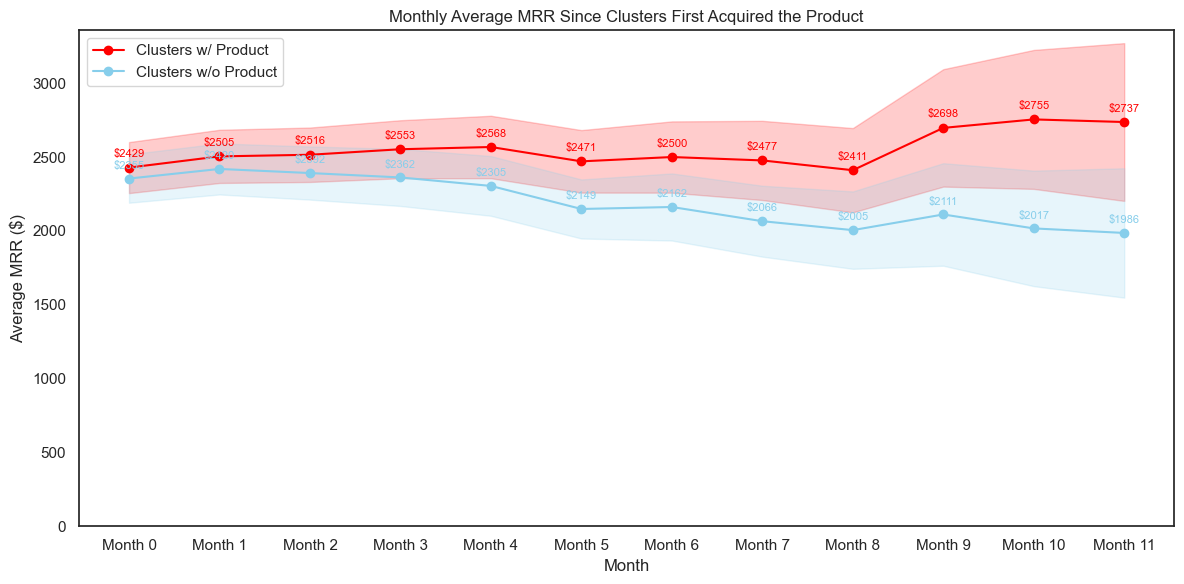

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem, t, mstats

# Dynamically generate MRR columns
mrr_columns = [col for col in final_dataset_with_monthly_mrr.columns if "Month" in col]
mrr_columns = sorted(mrr_columns, key=lambda x: int(x.split(" ")[-1]))[:12]


def calculate_means_and_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = sem(data) if n > 1 else 0
    margin = std_err * t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - margin, mean + margin


def winsorize_by_month(data, mrr_columns):
    for month in mrr_columns:
        # Select non-zero and non-null values for winsorization
        valid_values = data[(data[month] != 0) & (data[month].notna())][month]
        winsorized_values = mstats.winsorize(valid_values, limits=[0.05, 0.05])

        # Update the dataframe with winsorized values for non-zero and non-null entries
        data.loc[(data[month] != 0) & (data[month].notna()), month] = winsorized_values

    return data


# Apply winsorization to the dataset
final_dataset_with_monthly_mrr = winsorize_by_month(
    final_dataset_with_monthly_mrr, mrr_columns
)

original_group_colors = {"treatment group": "red", "control group": "skyblue"}
group_rename = {
    "treatment group": "Clusters w/ Product",
    "control group": "Clusters w/o Product",
}

plt.figure(figsize=(12, 6))

for original_group, color in original_group_colors.items():
    new_group_name = group_rename[original_group]
    means = []
    lower_cis = []
    upper_cis = []
    for month in mrr_columns:  # Loop through the filtered/selected month columns
        month_data = final_dataset_with_monthly_mrr[
            (final_dataset_with_monthly_mrr["group_assignment"] == original_group)
            & final_dataset_with_monthly_mrr[month].notna()
        ][month]
        mean, lower_ci, upper_ci = calculate_means_and_ci(month_data)
        means.append(mean)
        lower_cis.append(lower_ci)
        upper_cis.append(upper_ci)

    plt.plot(mrr_columns, means, marker="o", label=new_group_name, color=color)
    plt.fill_between(mrr_columns, lower_cis, upper_cis, color=color, alpha=0.2)

    for i, mean in enumerate(means):
        plt.text(
            mrr_columns[i],
            mean + (max(upper_cis) - min(lower_cis)) * 0.05,
            f"${mean:.0f}",
            ha="center",
            va="bottom",
            fontsize=8,
            color=color,
        )

plt.title("Monthly Average MRR Since Clusters First Acquired the Product")
plt.xlabel("Month")
plt.ylabel("Average MRR ($)")
plt.legend(loc="upper left")
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

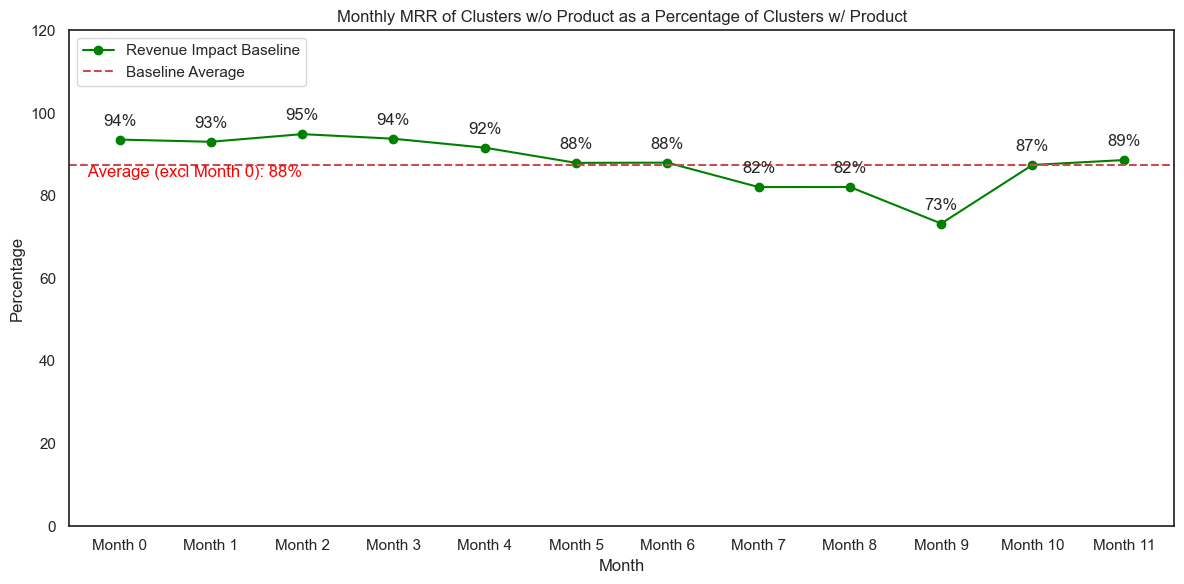

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem, t

plt.figure(figsize=(12, 6))

group_means = {}

for original_group in ["treatment group", "control group"]:
    means = []
    lower_cis = []
    upper_cis = []
    for month in mrr_columns:
        month_data = final_dataset_with_monthly_mrr[
            (final_dataset_with_monthly_mrr["group_assignment"] == original_group)
            & final_dataset_with_monthly_mrr[month].notna()
        ][month]
        mean, lower_ci, upper_ci = calculate_means_and_ci(month_data)
        means.append(mean)
        lower_cis.append(lower_ci)
        upper_cis.append(upper_ci)
    group_means[original_group] = (means, lower_cis, upper_cis)

# Calculate percentage of control group mean MRR to treatment group mean MRR
treatment_means, _, _ = group_means["treatment group"]
control_means, _, _ = group_means["control group"]
percentage_means = [
    (control / treatment) * 100 if treatment else 0
    for control, treatment in zip(control_means, treatment_means)
]

# Calculate the average of the percentage means
average_percentage_mean = np.mean(percentage_means[1:])

# Plot the percentage line in green
plt.plot(
    mrr_columns,
    percentage_means,
    marker="o",
    color="green",
    label="Revenue Impact Baseline",
)

# Adding data labels for the percentage
for i, txt in enumerate(percentage_means):
    plt.annotate(
        f"{txt:.0f}%",
        (mrr_columns[i], percentage_means[i]),
        textcoords="offset points",
        xytext=(0, 10),
        ha="center",
    )

# Plot the average of the percentage means as a horizontal line
plt.axhline(
    y=average_percentage_mean, color="r", linestyle="--", label=f"Baseline Average"
)

# Add a label for the average line
# Adjust the x position as needed to place the label at the desired location on your chart
x_position_for_average_label = len(mrr_columns) - 10  # This puts it at the last month
plt.text(
    x_position_for_average_label,
    average_percentage_mean,
    f" Average (excl Month 0): {average_percentage_mean:.0f}%",
    verticalalignment="top",
    horizontalalignment="right",
    color="red",
)

plt.title("Monthly MRR of Clusters w/o Product as a Percentage of Clusters w/ Product")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.legend(loc="upper left")

# Increase the y-axis limit
plt.ylim(bottom=0, top=120)

plt.tight_layout()
plt.show()

### Sample Size

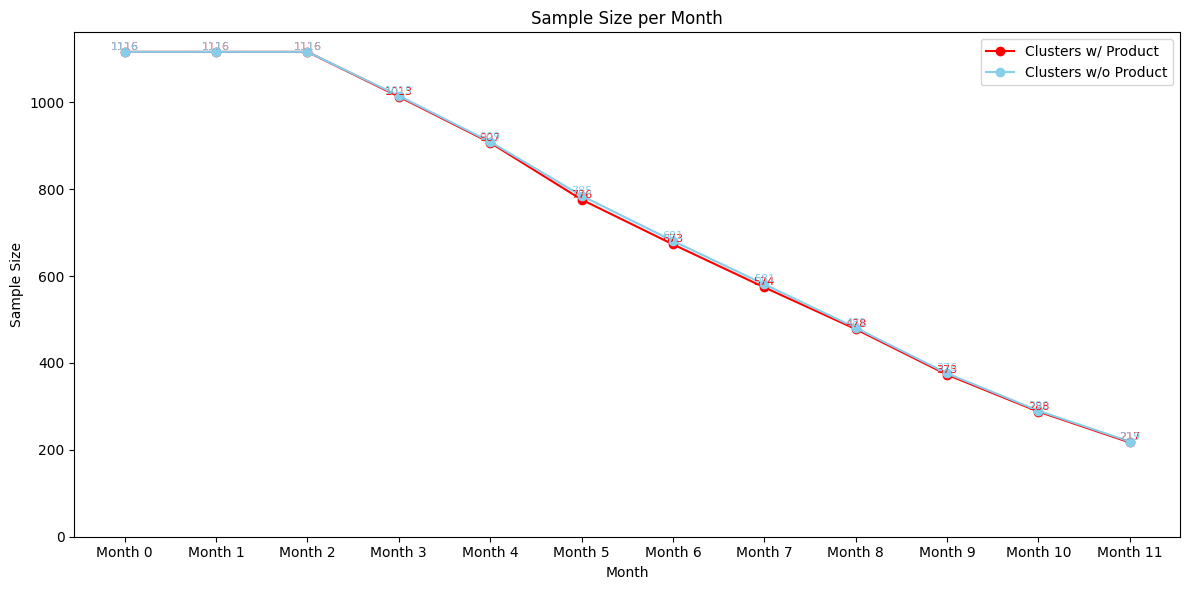

In [30]:
# Continuing from the previous script

plt.figure(figsize=(12, 6))

for original_group, color in original_group_colors.items():
    sample_sizes = []  # List to hold the sample size for each month
    for month in mrr_columns:
        # For each month, calculate the sample size of the non-null data for the current group
        sample_size = len(
            final_dataset_with_monthly_mrr[
                (final_dataset_with_monthly_mrr["group_assignment"] == original_group)
                & final_dataset_with_monthly_mrr[month].notna()
            ][month]
        )
        sample_sizes.append(sample_size)

    plt.plot(
        mrr_columns,
        sample_sizes,
        marker="o",
        linestyle="-",
        label=group_rename[original_group],
        color=color,
    )

    for i, size in enumerate(sample_sizes):
        plt.text(
            mrr_columns[i],
            size,
            f"{size}",
            ha="center",
            va="bottom",
            fontsize=8,
            color=color,
        )

plt.title("Sample Size per Month")
plt.xlabel("Month")
plt.ylabel("Sample Size")
plt.legend(loc="upper right")
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

# Revenue Allocation

### Approach #1 - Static Allocation

In [31]:
# Use previous percentage means list
percentage_means = [
    97.804844047644,
    92.62622004657587,
    87.52743197833564,
    84.75675652189551,
    83.95310838499024,
    81.1257192970022,
    79.40193019770567,
    77.0675077182838,
    76.57380869819313,
    76.95478784212231,
    72.10422499840014,
    74.39279915640566,
]

# Calculate the average of the percentage means
average_percentage_mean = np.mean(percentage_means[1:])

In [32]:
import pandas as pd
import numpy as np

# Create a copy of the original DataFrame
data = df_raw.copy()

# Ensure both 'ds' and product_ds columns in 'data' DataFrame are in datetime format
data["ds"] = pd.to_datetime(data["ds"])
data[product_ds] = pd.to_datetime(data[product_ds])

# Filter rows based on the condition that product_ds >= 'ds' and product_ds < '2024-02-01'
filtered_data = data[
    (data[product_ds].dt.to_period("M") <= data["ds"].dt.to_period("M"))
    & (data["ds"] <= pd.Timestamp("2024-01-01"))
]

# Calculate the total sum of MRR for the filtered data
total_mrr_sum = filtered_data["cluster_consumption_revenue"].sum()

# Print the total sum of MRR formatted with no decimals
print(f"Total sum of MRR for filtered clusters: ${total_mrr_sum:,.0f}")

# Calculate and print the number of unique clusters
unique_clusters_count = filtered_data["cluster_id"].nunique()
print(f"Number of unique clusters: {unique_clusters_count}")

# Get the baseline MRR percentage from 'average_percentage_mean'
baseline_mrr_percentage = average_percentage_mean

# Print the baseline MRR percentage with no decimals
print(f"Baseline MRR Percentage (average): {baseline_mrr_percentage:.0f}%")

# Calculate the incremental revenue percentage
incremental_revenue_percentage = 100 - baseline_mrr_percentage

# Print the incremental revenue percentage with no decimals
print(
    f"Incremental Revenue Percentage (1 - Baseline): {incremental_revenue_percentage:.0f}%"
)

# Calculate incremental revenue from the usage of product
incremental_revenue = total_mrr_sum * ((1 - baseline_mrr_percentage / 100))

# Print the incremental revenue with no decimals
print(f"Incremental revenue from product usage: ${incremental_revenue:,.0f}")

Total sum of MRR for filtered clusters: $71,831,355
Number of unique clusters: 5443
Baseline MRR Percentage (average): 81%
Incremental Revenue Percentage (1 - Baseline): 19%
Incremental revenue from product usage: $13,942,838


### Approach #2: Dynamic Allocation

In [33]:
from datetime import datetime

# Copy original DataFrame
data = df_raw.copy()

# Convert to datetime format and adjust to the first day of the month
data["ds"] = pd.to_datetime(data["ds"]).dt.to_period("M").dt.to_timestamp()
data[product_ds] = pd.to_datetime(data[product_ds]).dt.to_period("M").dt.to_timestamp()

# Filter data based on conditions
filtered_data = data[
    (data[product_ind] == 1)
    & (data[product_ds] <= data["ds"])  # Direct comparison using first day of the month
    & (data["ds"] >= "2023-02-01")  # Start date filter
    & (data["ds"] <= "2024-01-31")  # End date filter
].copy()

In [34]:
from dateutil.relativedelta import relativedelta

# Calculate total month difference between 'ds' and 'product_ds' columns considering years, and cap at 11
filtered_data["month_diff"] = filtered_data.apply(
    lambda row: min(
        relativedelta(row["ds"], row[product_ds]).years * 12
        + relativedelta(row["ds"], row[product_ds]).months,
        11,
    ),
    axis=1,
)

# Group by month difference and sum total cluster_consumption_revenue
monthly_mrr = (
    filtered_data.groupby("month_diff")["cluster_consumption_revenue"]
    .sum()
    .reset_index()
)

In [35]:
import pandas as pd
from tabulate import tabulate

# Create a copy of the DataFrame to work with
adjusted_mrr = monthly_mrr.copy()

# Add original total revenue to the copy for reference and rename the columns
adjusted_mrr["original_revenue"] = adjusted_mrr["cluster_consumption_revenue"]
adjusted_mrr.rename(
    columns={
        "month_diff": "product_tenure",
        "cluster_consumption_revenue": "attributed_consumption_revenue",
        "original_revenue": "cluster_revenue",
    },
    inplace=True,
)

# Update the code to include the percentage columns and adjusted revenue
for i, baseline_percentage in enumerate(percentage_means):
    month = i
    if month >= 0:
        # Calculate the adjusted revenue
        adjusted_factor = 1 - (baseline_percentage / 100)
        adjusted_revenue = (
            adjusted_mrr.loc[
                adjusted_mrr["product_tenure"] == month,
                "attributed_consumption_revenue",
            ]
            * adjusted_factor
        )

        # Update the DataFrame with the new adjusted revenue
        adjusted_mrr.loc[
            adjusted_mrr["product_tenure"] == month, "attributed_consumption_revenue"
        ] = adjusted_revenue

        # Store the percentage and 1-percentage with two decimal places
        adjusted_mrr.loc[
            adjusted_mrr["product_tenure"] == month, "baseline_percentage"
        ] = f"{baseline_percentage:.2f}%"
        adjusted_mrr.loc[
            adjusted_mrr["product_tenure"] == month, "attributed_revenue_percentage"
        ] = f"{adjusted_factor:.2%}"

# Calculate the sum of the adjusted and original revenues
total_adjusted_revenue = adjusted_mrr["attributed_consumption_revenue"].sum()
total_cluster_revenue = adjusted_mrr["cluster_revenue"].sum()

# Format the revenue columns as currency in the adjusted DataFrame
adjusted_mrr["cluster_revenue"] = adjusted_mrr["cluster_revenue"].apply(
    lambda x: f"${x:,.2f}"
)
adjusted_mrr["attributed_consumption_revenue"] = adjusted_mrr[
    "attributed_consumption_revenue"
].apply(lambda x: f"${x:,.2f}")

# Append total rows for both revenues
total_row = pd.DataFrame(
    {
        "product_tenure": ["Total"],
        "cluster_revenue": [f"${total_cluster_revenue:,.2f}"],
        "attributed_consumption_revenue": [f"${total_adjusted_revenue:,.2f}"],
    }
)
adjusted_mrr = pd.concat([adjusted_mrr, total_row], ignore_index=True)

# Print the adjusted DataFrame using tabulate for a nicer table format
print(tabulate(adjusted_mrr, headers="keys", tablefmt="psql"))

# Print the total revenues with formatting
print(f"\nTotal Cluster Revenue: ${total_cluster_revenue:,.2f}")
print(f"Total Attributed Consumption Revenue: ${total_adjusted_revenue:,.2f}")

+----+------------------+----------------------------------+-------------------+-----------------------+---------------------------------+
|    | product_tenure   | attributed_consumption_revenue   | cluster_revenue   | baseline_percentage   | attributed_revenue_percentage   |
|----+------------------+----------------------------------+-------------------+-----------------------+---------------------------------|
|  0 | 0                | $85,423.89                       | $3,891,472.64     | 97.80%                | 2.20%                           |
|  1 | 1                | $281,874.03                      | $3,822,653.18     | 92.63%                | 7.37%                           |
|  2 | 2                | $458,064.18                      | $3,672,573.12     | 87.53%                | 12.47%                          |
|  3 | 3                | $538,628.03                      | $3,533,552.59     | 84.76%                | 15.24%                          |
|  4 | 4                | $

# Appendix

### Multiple Product Usage

In [36]:
# import pandas as pd
# from itertools import combinations

# # Create a copy of the original DataFrame
# data = df_raw.copy()

# # Define product columns based on your data sample
# product_columns = [
#     "text_search_ind",
#     "vector_search_ind",
#     "timeseries_ind",
#     "sync_ind",
#     "triggers_functions_ind",
#     "charts_ind",
#     "onlinearchive_ind",
#     "adf_ind",
#     "sql_ind",
# ]

# # Total unique clusters
# total_unique_clusters = data["cluster_id"].nunique()


# # Helper function to find clusters with >=N products
# def find_clusters_with_n_or_more_products(df, product_columns, n):
#     clusters = set()
#     for combo_length in range(n, len(product_columns) + 1):
#         for combo in combinations(product_columns, combo_length):
#             temp_df = df[df[list(combo)].sum(axis=1) >= n]
#             clusters.update(temp_df["cluster_id"].unique())
#     return clusters


# # Clusters with at least 1 product
# clusters_with_at_least_1_product = find_clusters_with_n_or_more_products(
#     data, product_columns, 1
# )

# # Clusters with at least 2 products
# clusters_with_at_least_2_products = find_clusters_with_n_or_more_products(
#     data, product_columns, 2
# )

# # Clusters with at least 3 products
# clusters_with_at_least_3_products = find_clusters_with_n_or_more_products(
#     data, product_columns, 3
# )

# # Print the results
# print(f"Total Unique Clusters: {total_unique_clusters}")
# print(
#     f"Unique Clusters with at Least 1 Product: {len(clusters_with_at_least_1_product)}"
# )
# print(
#     f"Unique Clusters with at Least 2 Products: {len(clusters_with_at_least_2_products)}"
# )
# print(
#     f"Unique Clusters with at Least 3 Products: {len(clusters_with_at_least_3_products)}"
# )

In [37]:
# # Total MRR for all clusters
# data = data[data["ds"] <= "2024-01-01"].copy()
# total_mrr_all_clusters = data["cluster_consumption_revenue"].sum()

# # Calculating MRR and counting unique clusters
# mrr_1_product = data[data["cluster_id"].isin(clusters_with_at_least_1_product)][
#     "cluster_consumption_revenue"
# ].sum()
# count_1_product = len(clusters_with_at_least_1_product)

# mrr_2_products = data[data["cluster_id"].isin(clusters_with_at_least_2_products)][
#     "cluster_consumption_revenue"
# ].sum()
# count_2_products = len(clusters_with_at_least_2_products)

# mrr_3_products = data[data["cluster_id"].isin(clusters_with_at_least_3_products)][
#     "cluster_consumption_revenue"
# ].sum()
# count_3_products = len(clusters_with_at_least_3_products)

# # Calculating percentages
# percentage_mrr_1_product = (mrr_1_product / total_mrr_all_clusters) * 100
# percentage_mrr_2_products = (mrr_2_products / total_mrr_all_clusters) * 100
# percentage_mrr_3_products = (mrr_3_products / total_mrr_all_clusters) * 100

# # Print the results with unique cluster counts
# print(f"Total MRR for all clusters: ${total_mrr_all_clusters:,.0f}")
# print(
#     f"Clusters with at least 1 product: {count_1_product}, Total MRR: ${mrr_1_product:,.0f} ({percentage_mrr_1_product:.2f}%)"
# )
# print(
#     f"Clusters with at least 2 products: {count_2_products}, Total MRR: ${mrr_2_products:,.0f} ({percentage_mrr_2_products:.2f}%)"
# )
# print(
#     f"Clusters with at least 3 products: {count_3_products}, Total MRR: ${mrr_3_products:,.0f} ({percentage_mrr_3_products:.2f}%)"
# )

### Churn Chart

/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_90167/3740614204.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_dataset_with_monthly_mrr[churn_col] = np.select(conditions, choices, default=np.nan)
/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_90167/3740614204.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_dataset_with_monthly_mrr[churn_col] = np.select(conditions, choices, default=np.nan)
/var/folders/hf/yzqj_9c16qq6ktd52cj47flw0000gp/T/ipykernel_90167/3740614204.py:19: Performance

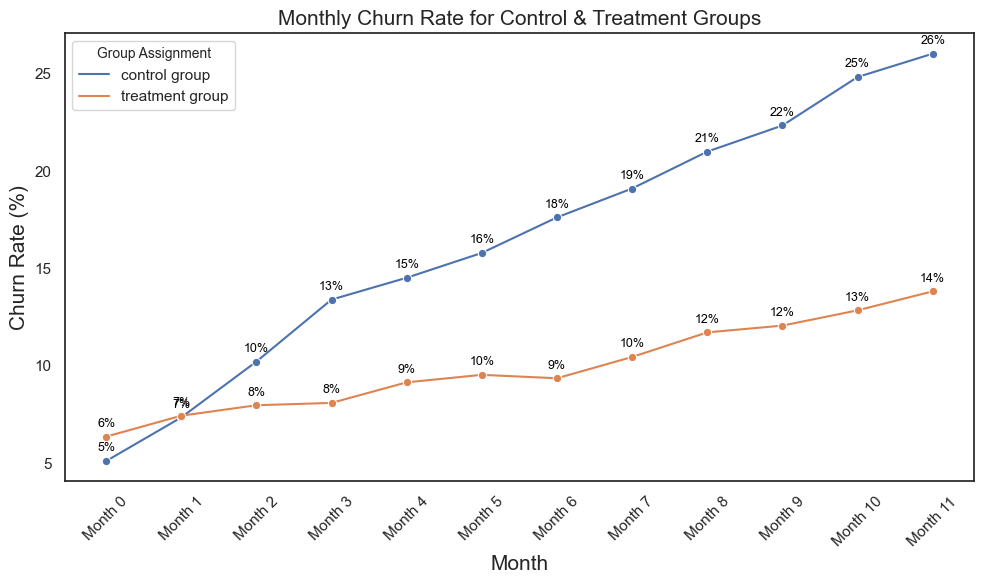

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_dataset_with_monthly_mrr' is your DataFrame and is already loaded

# Iterate over the DataFrame to create churn indicator columns based on the specified conditions
for month in range(13):
    mrr_col = f'Month {month}'  # Corrected column names
    churn_col = f'Month {month}_churn'
    
    # Define conditions for churn indicator
    conditions = [
        (final_dataset_with_monthly_mrr[mrr_col] == 0),  # Churn if value is 0
        (final_dataset_with_monthly_mrr[mrr_col].notnull())  # Not churn if value is not 0 and not null
    ]
    choices = [1, 0]  # Churn indicator values
    final_dataset_with_monthly_mrr[churn_col] = np.select(conditions, choices, default=np.nan)

# Initialize an empty DataFrame to store churn rates
churn_rates = pd.DataFrame()

# List of churn indicator columns
churn_indicator_columns = [f'Month {i}_churn' for i in range(13)]

# Calculate churn rates
for month_idx, col in enumerate(churn_indicator_columns):
    # Group by 'group_assignment' and calculate churned clusters and total clusters with data
    churn_data = final_dataset_with_monthly_mrr.groupby('group_assignment')[col].agg(
        churned_clusters=np.sum,
        total_clusters_with_data=pd.Series.count
    ).reset_index()

    # Calculate churn rate
    churn_data['churn_rate'] = (churn_data['churned_clusters'] / churn_data['total_clusters_with_data']) * 100
    churn_data['month'] = f'Month {month_idx}'

    # Append to the churn_rates DataFrame
    churn_rates = pd.concat([churn_rates, churn_data], ignore_index=True)

# Filter to include only Month 0 to Month 11
churn_rates = churn_rates[churn_rates['month'].isin([f'Month {i}' for i in range(12)])]

# Set seaborn style for the plot
sns.set(style="white", rc={"axes.grid": False})

# Create a line plot
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=churn_rates, x='month', y='churn_rate', hue='group_assignment', marker='o')

# Plot enhancements
plt.title('Monthly Churn Rate for Control & Treatment Groups', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Churn Rate (%)', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Group Assignment', title_fontsize='10', fontsize='11')

# Adding data labels
for index, row in churn_rates.iterrows():
    plt.text(x=row['month'], y=row['churn_rate']+0.5,  # Slightly adjust the height for visibility
             s=f'{row["churn_rate"]:.0f}%', ha='center', color='black', fontsize=9)

plt.tight_layout()
plt.show()

In [39]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# data = df_raw.copy()
# data["ds"] = pd.to_datetime(data["ds"])

# # Reference date
# reference_date = pd.to_datetime("2023-02-01")

# # Extract year and month for both `ds` and `reference_date`, then calculate the month difference
# data["year"], data["month"] = data["ds"].dt.year, data["ds"].dt.month
# ref_year, ref_month = reference_date.year, reference_date.month

# # Calculate month difference as 12 times the year difference plus the month difference
# data["month_diff"] = (data["year"] - ref_year) * 12 + (data["month"] - ref_month)

# # Now, you can pivot your table with this adjusted 'month_diff'
# pivot_table = data.pivot_table(
#     index="cluster_id",
#     columns="month_diff",
#     values="cluster_consumption_revenue",
#     fill_value=0,
#     aggfunc="sum",
# ).reset_index()

# # Clean-up: You might want to drop the temporary columns 'year' and 'month' if they are no longer needed
# data.drop(columns=["year", "month"], inplace=True)

# # Filter rows where month 0 is not zero
# pivot_table = pivot_table[pivot_table[0] != 0]

# # Calculate churn rates for each month from 0 to 11
# churn_rates = []
# for month in range(12):  # Iterate through months 0 to 11
#     churn_count = pivot_table[pivot_table[month] == 0].shape[0]
#     total_count = pivot_table.shape[0]
#     churn_rate = churn_count / total_count
#     churn_rates.append(churn_rate)

# # Plot churn rates
# plt.figure(figsize=(14, 8))  # Set figure size
# plt.plot(range(12), churn_rates, marker="o", linestyle="-", color="b")

# # Adding data labels for each point
# for i, rate in enumerate(churn_rates):
#     plt.text(i, rate, f"{rate:.0%}", ha="center", va="bottom")

# plt.title("Churn Rate for 2023-02 Active Cluster Cohort", fontsize=15)
# plt.xlabel("Month")
# plt.ylabel("Churn Rate")
# plt.xticks(range(12), labels=[f"Month {i}" for i in range(12)])
# plt.grid(False)
# plt.show()

In [40]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# data = df_raw.copy()

# data["ds"] = pd.to_datetime(data["ds"])
# data["created_at"] = pd.to_datetime(
#     data["created_at"]
# )  # Ensure 'created_at' is in datetime format

# # Narrow down to the population created in February 2023
# start_date = pd.to_datetime("2023-02-01")
# end_date = pd.to_datetime("2023-02-28")
# data = data[(data["created_at"] >= start_date) & (data["created_at"] <= end_date)]

# # Reference date
# reference_date = pd.to_datetime("2023-02-01")

# # Extract year and month for both `ds` and `reference_date`, then calculate the month difference
# data["year"], data["month"] = data["ds"].dt.year, data["ds"].dt.month
# ref_year, ref_month = reference_date.year, reference_date.month

# # Calculate month difference as 12 times the year difference plus the month difference
# data["month_diff"] = (data["year"] - ref_year) * 12 + (data["month"] - ref_month)

# # Now, you can pivot your table with this adjusted 'month_diff'
# pivot_table = data.pivot_table(
#     index="cluster_id",
#     columns="month_diff",
#     values="cluster_consumption_revenue",
#     fill_value=0,
#     aggfunc="sum",
# ).reset_index()

# # Clean-up: You might want to drop the temporary columns 'year' and 'month' if they are no longer needed
# data.drop(columns=["year", "month"], inplace=True)

# # Filter rows where month 0 is not zero
# pivot_table = pivot_table[pivot_table[0] != 0]

# # Calculate churn rates for each month from 0 to 11
# churn_rates = []
# for month in range(12):  # Iterate through months 0 to 11
#     churn_count = pivot_table[pivot_table[month] == 0].shape[0]
#     total_count = pivot_table.shape[0]
#     churn_rate = churn_count / total_count
#     churn_rates.append(churn_rate)

# # Plot churn rates
# plt.figure(figsize=(14, 8))  # Set figure size
# plt.plot(range(12), churn_rates, marker="o", linestyle="-", color="b")

# # Adding data labels for each point
# for i, rate in enumerate(churn_rates):
#     plt.text(i, rate, f"{rate:.0%}", ha="center", va="bottom")

# plt.title("Churn Rate for Feb 2023 Created Cluster Cohort", fontsize=15)
# plt.xlabel("Month")
# plt.ylabel("Churn Rate")
# plt.xticks(range(12), labels=[f"Month {i}" for i in range(12)])
# plt.grid(False)
# plt.show()

### Small Sample Size

In [41]:
# import matplotlib.pyplot as plt

# # Data setup
# products = ["text_search", "vector_search", "time_series", "sync", "trigger and functions",
#             "charts", "online archive", "adf", "sql"]
# unique_clusters = [5443, 365, 1424, 1109, 6097, 7931, 1976, 2194, 186]
# definitions = ["qualification", "qualification", "qualification", "qualification",
#                "activation", "activation", "activation", "activation", "activation"]

# # Choose colors based on 'definitions'
# colors = ['#1f77b4' if defi == "qualification" else '#ff7f0e' for defi in definitions]

# # Create bar chart
# fig, ax = plt.subplots(figsize=(10, 6))
# bars = ax.barh(products, unique_clusters, color=colors)

# # Adding grid, background color, and customizing axes
# ax.set_facecolor('#f9f9f9')
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax.set_axisbelow(True)

# # Annotating small sample sizes
# for bar, value in zip(bars, unique_clusters):
#     if value < 1000:
#         ax.annotate(f'Small sample: {value}', (value + 100, bar.get_y() + bar.get_height()/2),
#                     textcoords="offset points", xytext=(5,0), va='center', fontsize=8, color='red')

# # Enhance labels and title
# ax.set_xlabel('Number of Unique Clusters')
# ax.set_title('Product Unique Clusters Overview', fontsize=14, fontweight='bold')
# ax.xaxis.set_tick_params(labelsize=10)
# ax.yaxis.set_tick_params(labelsize=10)

# # Add legend with a title
# qualification_bar = plt.Rectangle((0,0),1,1, fc="#1f77b4", edgecolor='none')
# activation_bar = plt.Rectangle((0,0),1,1, fc='#ff7f0e', edgecolor='none')
# ax.legend([qualification_bar, activation_bar], ['Qualification', 'Activation'], loc='upper right', title="Definition Used")

# # Add concise note about the data context and adjust position
# note_text = ("Note: The numbers shown are the total clusters available for revenue distribution per product during FY24")
# plt.gcf().subplots_adjust(bottom=0.15)  # Adjust the bottom to prevent overlap
# plt.figtext(0.5, 0.01, note_text, wrap=True, horizontalalignment='center', fontsize=10, color='darkred')

# # Show the plot
# plt.show()


### Qualified within 30 days

In [42]:
import pandas as pd

# Create a copy of the original DataFrame
data = df_raw.copy()

# Convert the date columns to datetime if they are not already
data['created_at'] = pd.to_datetime(data['created_at'])
data['text_search_ds'] = pd.to_datetime(data['text_search_ds'])

# Filter where text_search_ds is within 30 days of created_at
mask = (data['text_search_ds'] >= data['created_at']) & (data['text_search_ds'] <= data['created_at'] + pd.Timedelta(days=30))
filtered_data = data[mask]

# Drop duplicates based on the cluster_id to find unique clusters
unique_clusters = filtered_data.drop_duplicates(subset='cluster_id')

# Display the unique clusters
unique_clusters[['cluster_id', 'text_search_ds', 'created_at']]


,cluster_id,text_search_ds,created_at
543,64a3e3909ad267080fb694ee,2023-07-26,2023-07-04 09:17:04.812
2094,64026a1ef18f814b78dba1e2,2023-03-25,2023-03-03 21:43:58.757
2121,65127d4bcc4999442005b4b2,2023-10-19,2023-09-26 06:42:19.695
2261,6363d8bc8a108258d8172bec,2022-11-29,2022-11-03 15:05:32.477
2409,64b6560b2fe89078d13d3c3d,2023-08-09,2023-07-18 09:06:19.836
...,...,...,...
1991162,65dd99a67d203f1aa712e31a,2024-03-20,2024-02-27 08:13:26.414
2006597,65cadb6ce810db6c2b851d14,2024-03-09,2024-02-13 03:01:00.441
2007226,65dc5aae6746b047fa5138a8,2024-03-21,2024-02-26 09:32:30.672
2011066,65c919755d0a9e3227f8a68a,2024-03-05,2024-02-11 19:01:09.139


In [43]:
unique_clusters.shape

(656, 112)